In [8]:
def addEdge(adjList, u, v):
    adjList[u].append(v)


vertices = 5

# Adjacency list representation of the graph
adjList = [[] for _ in range(vertices)]

# Add edges to the graph
addEdge(adjList, 0, 1)
addEdge(adjList, 0, 2)
addEdge(adjList, 1, 3)
addEdge(adjList, 1, 4)
addEdge(adjList, 2, 4)
adjList

[[1, 2], [3, 4], [4], [], []]

https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/

**DFS**

In [9]:
def dfs(u, adjList, visited):
    print(u, end=" ")
    visited[u] = True
    for v in adjList[u]:
        if visited[v] == False:
            dfs(v, adjList, visited)


visited = [False] * vertices
for u in range(vertices):
    if visited[u] == False:
        dfs(u, adjList, visited)

0 1 3 4 2 

In [10]:
# if graph is connected  we can reach all nodes from zero nodes
visited = [False] * vertices
dfs(0, adjList, visited)

0 1 3 4 2 

**Find root vertex of a graph**

all other vertices in the graph can be reached from the root vertex.

In [11]:
# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):
        # resize the list to hold `n` elements
        self.adj = [[] for _ in range(n)]

        # add an edge from source to destination
        for edge in edges:
            self.adj[edge[0]].append(edge[1])


# Function to perform DFS traversal on the graph
def DFS(graph, v, discovered):

    discovered[v] = True  # mark the current node as discovered

    # do for every edge (v, u)
    for u in graph.adj[v]:
        if not discovered[u]:  # `u` is not discovered
            DFS(graph, u, discovered)


# Function to find the root vertex of a graph
def findRootVertex(graph, n):

    # to keep track of all previously discovered vertices in DFS
    discovered = [False] * n

    # find the last starting vertex `v` in DFS
    v = 0
    for i in range(n):
        if not discovered[i]:
            DFS(graph, i, discovered)
            v = i

    # reset the discovered vertices
    discovered[:] = [False] * n

    # perform DFS on the graph from the last starting vertex `v`
    DFS(graph, v, discovered)

    # return -1 if all vertices are not reachable from vertex `v`
    for i in range(n):
        if not discovered[i]:
            return -1

    # we reach here only if `v` is a root vertex
    return v


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 3), (4, 5), (5, 0)]

    # total number of nodes in the graph (0 to 5)
    n = 6

    # build a directed graph from the given edges
    graph = Graph(edges, n)

    # find the root vertex in the graph
    root = findRootVertex(graph, n)

    if root != -1:
        print("The root vertex is", root)
    else:
        print("The root vertex does not exist")

The root vertex is 4


**BFS**

In [14]:
from collections import deque


def bfs(adjList, startNode, visited):
    # Create a queue for BFS
    q = deque()

    # Mark the current node as visited and enqueue it

    q.append(startNode)
    visited[startNode] = True

    # Iterate over the queue
    while q:
        # Dequeue a vertex from queue and print it
        for _ in range(len(q)):
            currentNode = q.popleft()
            print(currentNode, end=" ")

            # Get all adjacent vertices of the dequeued vertex
            # If an adjacent has not been visited, then mark it visited and enqueue it
            for neighbor in adjList[currentNode]:
                if not visited[neighbor]:
                    visited[neighbor] = True
                    q.append(neighbor)


def bfs2(adjList, startNode, visited):
    # Create a queue for BFS
    q = deque()

    # Mark the current node as visited and enqueue it

    q.append(startNode)
    visited[startNode] = True

    # Iterate over the queue
    while q:
        # Dequeue a vertex from queue and print it
        # for _ in range(len(q)):
        currentNode = q.popleft()
        print(currentNode, end=" ")

        # Get all adjacent vertices of the dequeued vertex
        # If an adjacent has not been visited, then mark it visited and enqueue it
        for neighbor in adjList[currentNode]:
            if not visited[neighbor]:
                q.append(neighbor)
        visited[currentNode] = True


visited = [False] * vertices
bfs(adjList, 0, visited)

0 1 2 3 4 

In [15]:
visited = [False] * vertices
bfs2(adjList, 0, visited)

0 1 2 3 4 4 

**Find level of a node**

In [6]:
def _bfs(v, adj, X):
    q = deque([])
    q.append((0, 0))
    # level=0

    # Visited array to mark the already visited nodes
    visited = [0] * (len(adj) + 1)
    visited[0] = 1

    # BFS traversal
    while q:
        curr, level = q.popleft()
        if curr == X:
            return level
        for node in adj[curr]:
            if visited[node] == 0:
                visited[node] = 1
                q.append((node, level + 1))

    return -1


def bfs_(v, adj, X):
    q = deque([])
    q.append(0)
    level = 0

    # Visited array to mark the already visited nodes
    visited = [0] * (len(adj) + 1)
    visited[0] = 1

    # BFS traversal
    while len(q) > 0:
        sz = len(q)
        while sz > 0:
            currentNode = q[0]
            q.popleft()
            if currentNode == X:
                return level
            for it in adj[currentNode]:
                if not visited[it]:
                    q.append(it)
                    visited[it] = 1
            sz = sz - 1
        level = level + 1

    return -1

**Cycles in Graph**

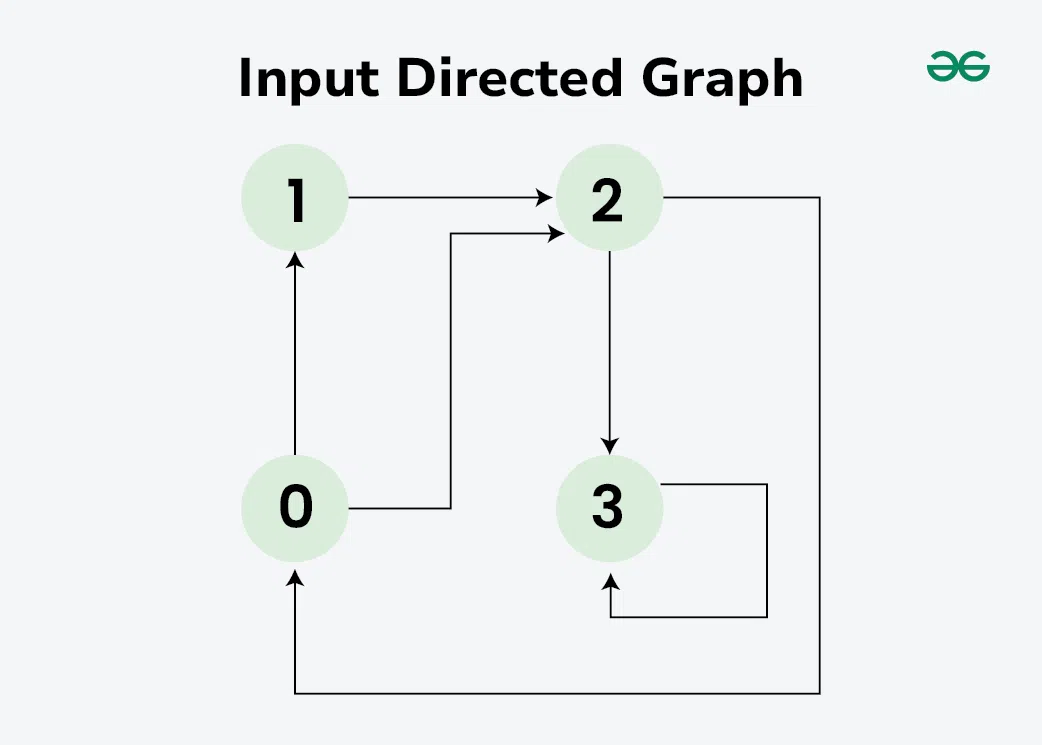

In [7]:
# if during recursion, we reach a node that is already in the recursion stack, there is a cycle present in the graph.
class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for _ in range(V)]

    def addEdge(self, v, w):
        self.adj[v].append(w)


def isCyclicUtil(v, visited, recStack):

    # Mark current node as visited and
    # adds to recursion stack
    visited[v] = True
    recStack[v] = True

    # Recur for all neighbours
    # if any neighbour is visited and in
    # recStack then graph is cyclic
    for neighbour in g.adj[v]:
        if visited[neighbour] == False:
            if isCyclicUtil(neighbour, visited, recStack) == True:
                return True
        elif recStack[neighbour] == True:
            return True

    # The node needs to be popped from
    # recursion stack before function ends
    recStack[v] = False
    return False


# Returns true if graph is cyclic else false
def isCyclic(V):
    visited = [False] * (V)
    recStack = [False] * (V)
    for node in range(V):
        if visited[node] == False:
            if isCyclicUtil(node, visited, recStack) == True:
                return True
    return False


V = 4
g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
if isCyclic(V) == 1:
    print("Graph contains cycle")
else:
    print("Graph doesn't contain cycle")

Graph contains cycle


In [2]:
from collections import deque


class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for _ in range(V)]

    def addEdge(self, v, w):
        self.adj[v].append(w)

    def isCyclic(self):
        inDegree = [0] * self.V
        q = deque()
        visited = 0

        # Calculate in-degree of each vertex
        for u in range(self.V):
            for v in self.adj[u]:
                inDegree[v] += 1

        # Enqueue vertices with 0 in-degree
        for u in range(self.V):
            if inDegree[u] == 0:
                q.append(u)

        # BFS traversal
        while q:
            u = q.popleft()
            visited += 1

            # Reduce in-degree of adjacent vertices
            for v in self.adj[u]:
                inDegree[v] -= 1
                # If in-degree becomes 0, enqueue the vertex
                if inDegree[v] == 0:
                    q.append(v)

        return visited != self.V  # If not all vertices are visited, there is a cycle


g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

if g.isCyclic():
    print("Graph contains a cycle.")
else:
    print("Graph does not contain a cycle.")

Graph contains a cycle.


**Cycle in undirected graph**

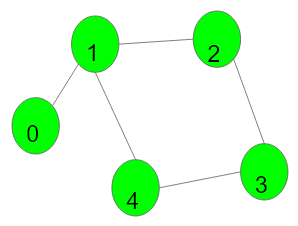

In [9]:
def isCyclicUtil(v, visited, adj, parent):

    # Mark the current node as visited
    visited[v] = True

    # Recur for all the vertices
    # adjacent to this vertex
    for i in adj[v]:

        # If the node is not
        # visited then recurse on it
        if visited[i] == False:
            if isCyclicUtil(i, visited, adj, v):
                return True
        # If an adjacent vertex is
        # visited and not parent
        # of current vertex,
        # then there is a cycle
        elif parent != i:
            return True

    return False


# Returns true if the graph
# contains a cycle, else false.


def isCyclic(adj, V):

    # Mark all the vertices
    # as not visited
    visited = [False] * (V)

    # Call the recursive helper
    # function to detect cycle in different
    # DFS trees
    for i in range(V):

        # Don't recur for u if it
        # is already visited
        if visited[i] == False:
            if (isCyclicUtil(i, visited, adj, -1)) == True:
                return True

    return False


V = 5
E = 5
adj = [[1], [0, 2, 4], [1, 3], [2, 4], [1, 3]]
print(isCyclic(adj, V))

True


In [4]:
def isCyclicConnected(adj, s, V, visited):
    q = deque()
    q.append((s, None))
    visited[s] = True  # Mark as visited
    while q:
        for _ in range(len(q)):
            v, parent = q.popleft()

            for it in adj[v]:
                if not visited[it]:
                    visited[it] = True
                    q.append((it, v))
                elif parent != it:
                    return True

    return False


def isCyclicDisconnected(adj, V):
    visited = [False] * V

    for i in range(V):
        if not visited[i] and isCyclicConnected(adj, i, V, visited):
            return True

    return False


V = 5
E = 5
adj = [[1], [0, 2, 4], [1, 3], [2, 4], [1, 3]]
print(isCyclicDisconnected(adj, V))

True


Topological sorting for Directed Acyclic Graph (DAG) is a linear ordering of vertices such that for every directed edge u-v, vertex u comes before v in the ordering.

Note: Topological Sorting for a graph is not possible if the graph is not a DAG.

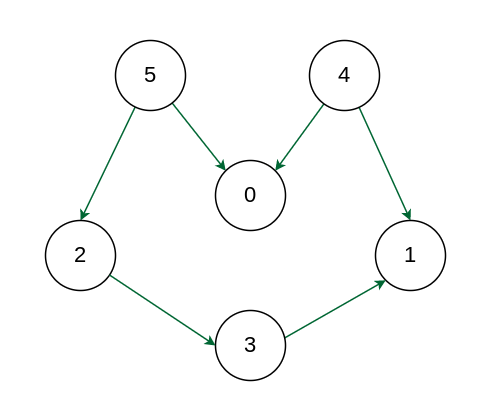

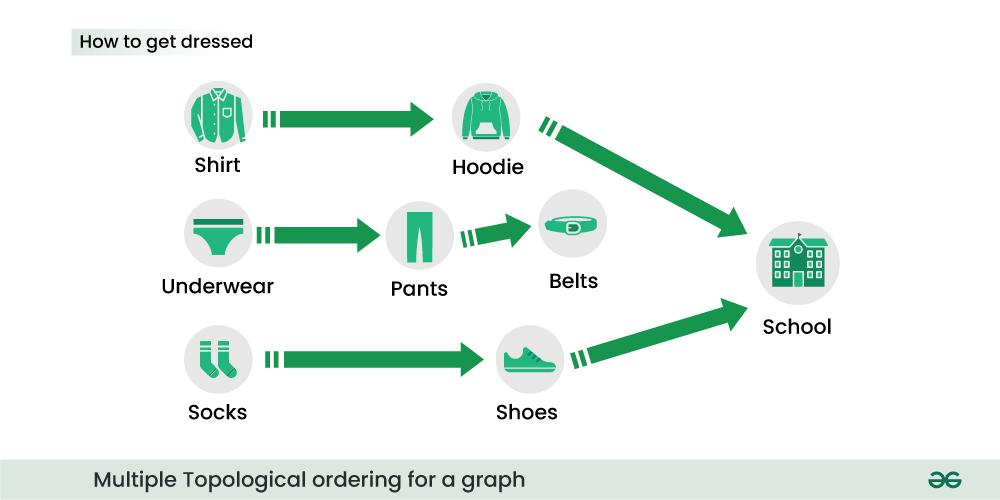

In [11]:
def topologicalSortUtil(v, adj, visited, stack):
    # Mark the current node as visited
    visited[v] = True

    # Recur for all adjacent vertices
    for i in adj[v]:
        if not visited[i]:
            topologicalSortUtil(i, adj, visited, stack)

    # Push current vertex to stack which stores the result
    stack.append(v)


# Function to perform Topological Sort
def topologicalSort(adj, V):
    # Stack to store the result
    stack = []

    visited = [False] * V

    # Call the recursive helper function to store
    # Topological Sort starting from all vertices one by
    # one
    for i in range(V):
        if not visited[i]:
            topologicalSortUtil(i, adj, visited, stack)

    # Print contents of stack
    print("Topological sorting of the graph:", end=" ")
    while stack:
        print(stack.pop(), end=" ")


class Graph:
    def __init__(self, vertices):
        # Number of vertices
        self.V = vertices
        # Dictionary to store adjacency lists
        self.adj = [[] for _ in range(self.V)]

    def addEdge(self, u, v):
        # Function to add an edge to the graph
        self.adj[u].append(v)


# Driver code
if __name__ == "__main__":
    V = 6
    g = Graph(V)
    # edges = [[0, 1], [1, 2], [3, 1], [3, 2]]
    # for u, v in edges:
    #     g.addEdge(u, v)
    g.addEdge(5, 2)
    g.addEdge(5, 0)
    g.addEdge(4, 0)
    g.addEdge(4, 1)
    g.addEdge(2, 3)
    g.addEdge(3, 1)
    # Number of nodes
    # V = 4

    # # Edges
    # edges = [[0, 1], [1, 2], [3, 1], [3, 2]]

    # # Graph represented as an adjacency list
    # adj = [[] for _ in range(V)]

    # for i in edges:
    #     adj[i[0]].append(i[1])

    topologicalSort(g.adj, V)

Topological sorting of the graph: 5 4 2 3 1 0 

In [39]:
from collections import defaultdict


class Graph:
    def __init__(self, vertices):
        # Number of vertices
        self.V = vertices
        # Dictionary to store adjacency lists
        self.adj = [[] for _ in range(self.V)]

    def addEdge(self, u, v):
        # Function to add an edge to the graph
        self.adj[u].append(v)

    def topologicalSort(self):
        # Function to perform Topological Sort
        # Create a list to store in-degree of all vertices
        in_degree = [0] * self.V

        # Traverse adjacency lists to fill in_degree of vertices
        for i in range(self.V):
            for j in self.adj[i]:
                in_degree[j] += 1

        # Create a queue and enqueue all vertices with in-degree 0
        q = deque([])
        for i in range(self.V):
            if in_degree[i] == 0:
                q.append(i)

        # Initialize count of visited vertices
        count = 0

        # Create a list to store topological order
        top_order = []

        # One by one dequeue vertices from queue and enqueue
        # adjacent vertices if in-degree of adjacent becomes 0
        while q:
            # Extract front of queue (or perform dequeue)
            # and add it to topological order
            u = q.popleft()
            top_order.append(u)
            count += 1

            # Iterate through all its neighbouring nodes
            # of dequeued node u and decrease their in-degree
            # by 1
            for node in self.adj[u]:
                # If in-degree becomes zero, add it to queue
                in_degree[node] -= 1
                if in_degree[node] == 0:
                    q.append(node)

            # count += 1

        # Check if there was a cycle
        if count != self.V:
            print("Graph contains cycle")
            return

        # Print topological order
        print("Topological Sort:", top_order)


# Driver code
if __name__ == "__main__":
    # Create a graph given in the above diagram
    g = Graph(6)
    # edges = [[0, 1], [1, 2], [3, 1], [3, 2]]
    # for u, v in edges:
    #     g.addEdge(u, v)
    g.addEdge(5, 2)
    g.addEdge(5, 0)
    g.addEdge(4, 0)
    g.addEdge(4, 1)
    g.addEdge(2, 3)
    g.addEdge(3, 1)

    print("Following is a Topological Sort of the given graph")
    g.topologicalSort()

Following is a Topological Sort of the given graph
Topological Sort: [4, 5, 2, 0, 3, 1]


In [13]:
# class to represent a graph object
class Graph:

    # Constructor
    def __init__(self, edges, N):

        # A List of Lists to represent an adjacency list
        self.adjList = [[] for _ in range(N)]

        # stores in-degree of a vertex
        # initialize in-degree of each vertex by 0
        self.indegree = [0] * N

        # add edges to the undirected graph
        for src, dest in edges:

            # add an edge from source to destination
            self.adjList[src].append(dest)

            # increment in-degree of destination vertex by 1
            self.indegree[dest] = self.indegree[dest] + 1


# Recursive function to find
# all topological orderings of a given DAG
def findAllTopologicalOrders(graph, path, discovered, N):

    # do for every vertex
    for v in range(N):

        # proceed only if in-degree of current node is 0 and
        # current node is not processed yet
        if graph.indegree[v] == 0 and not discovered[v]:

            # for every adjacent vertex u of v,
            # reduce in-degree of u by 1
            for u in graph.adjList[v]:
                graph.indegree[u] = graph.indegree[u] - 1

            # include current node in the path
            # and mark it as discovered
            path.append(v)
            discovered[v] = True

            # recur
            findAllTopologicalOrders(graph, path, discovered, N)

            # backtrack: reset in-degree
            # information for the current node
            for u in graph.adjList[v]:
                graph.indegree[u] = graph.indegree[u] + 1

            # backtrack: remove current node from the path and
            # mark it as undiscovered
            path.pop()
            discovered[v] = False

    # print the topological order if
    # all vertices are included in the path
    if len(path) == N:
        print(path)


# Print all topological orderings of a given DAG
def printAllTopologicalOrders(graph):

    # get number of nodes in the graph
    N = len(graph.adjList)

    # create an auxiliary space to keep track of whether vertex is discovered
    discovered = [False] * N

    # list to store the topological order
    path = []

    # find all topological ordering and print them
    findAllTopologicalOrders(graph, path, discovered, N)


# Driver code
if __name__ == "__main__":

    # List of graph edges as per above diagram
    edges = [(5, 2), (5, 0), (4, 0), (4, 1), (2, 3), (3, 1)]

    print("All Topological sorts")

    # Number of nodes in the graph
    N = 6

    # create a graph from edges
    graph = Graph(edges, N)

    # print all topological ordering of the graph
    printAllTopologicalOrders(graph)

# This code is contributed by Priyadarshini Kumari

All Topological sorts
[4, 5, 0, 2, 3, 1]
[4, 5, 2, 0, 3, 1]
[4, 5, 2, 3, 0, 1]
[4, 5, 2, 3, 1, 0]
[5, 2, 3, 4, 0, 1]
[5, 2, 3, 4, 1, 0]
[5, 2, 4, 0, 3, 1]
[5, 2, 4, 3, 0, 1]
[5, 2, 4, 3, 1, 0]
[5, 4, 0, 2, 3, 1]
[5, 4, 2, 0, 3, 1]
[5, 4, 2, 3, 0, 1]
[5, 4, 2, 3, 1, 0]


**Bell-man Ford**

single source sortes path

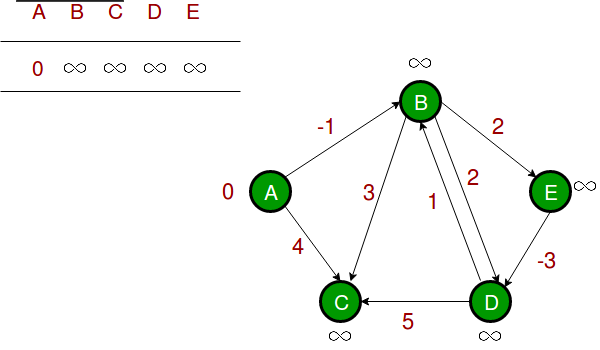

Bellman-Ford is a single source shortest path algorithm that determines the shortest path between a given source vertex and every other vertex in a graph.

 This algorithm can be used on both weighted and unweighted graphs.

 The shortest path cannot be found if there exists a negative cycle in the graph. If we continue to go around the negative cycle an infinite number of times,
 
  then the cost of the path will continue to decrease (even though the length of the path is increasing). 



In [14]:
class Graph:

    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []

    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    def get_path(self, parent, vertex):
        path = []
        while vertex != -1:
            path.append(vertex)
            vertex = parent[vertex]
        return path[::-1]

    # utility function used to print the solution
    def printArr(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print(
                f"The distance of vertex {i} from vertex {0} is {dist[i]}. "
                f"Its path is",
                self.get_path(self.parent, i),
            )
            # print(self.get_path(self.parent, i))
            # print("{0}\t\t{1}".format(i, dist[i]), self.get_path(self.parent, i))

    # The main function that finds shortest distances from src to
    # all other vertices using Bellman-Ford algorithm. The function
    # also detects negative weight cycle
    def BellmanFord(self, src):

        # Step 1: Initialize distances from src to all other vertices
        # as INFINITE
        dist = [float("Inf")] * self.V
        dist[src] = 0
        self.parent = [-1] * self.V

        # Step 2: Relax all edges |V| - 1 times. A simple shortest
        # path from src to any other vertex can have at-most |V| - 1
        # edges
        for _ in range(self.V - 1):
            # Update dist value and parent index of the adjacent vertices of
            # the picked vertex. Consider only those vertices which are still in
            # queue
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                    self.parent[v] = u

        # Step 3: check for negative-weight cycles. The above step
        # guarantees shortest distances if graph doesn't contain
        # negative weight cycle. If we get a shorter path, then there
        # is a cycle.

        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                return

        # print all distance
        self.printArr(dist)


# Driver's code
if __name__ == "__main__":
    edges = [
        # (x, y, w) —> edge from `x` to `y` having weight `w`
        (0, 1, -1),
        (0, 2, 4),
        (1, 2, 3),
        (1, 3, 2),
        (1, 4, 2),
        (3, 2, 5),
        (3, 1, 1),
        (4, 3, -3),
    ]

    # set the maximum number of nodes in the graph
    n = 5
    g = Graph(5)
    for u, v, w in edges:
        g.addEdge(u, v, w)
    # g.addEdge(0, 1, -1)
    # g.addEdge(0, 2, 4)
    # g.addEdge(1, 2, 3)
    # g.addEdge(1, 3, 2)
    # g.addEdge(1, 4, 2)
    # g.addEdge(3, 2, 5)
    # g.addEdge(3, 1, 1)
    # g.addEdge(4, 3, -3)

    # function call
    g.BellmanFord(0)

Vertex Distance from Source
The distance of vertex 0 from vertex 0 is 0. Its path is [0]
The distance of vertex 1 from vertex 0 is -1. Its path is [0, 1]
The distance of vertex 2 from vertex 0 is 2. Its path is [0, 1, 2]
The distance of vertex 3 from vertex 0 is -2. Its path is [0, 1, 4, 3]
The distance of vertex 4 from vertex 0 is 1. Its path is [0, 1, 4]


The Floyd Warshall Algorithm is an all pair shortest path algorithm unlike Dijkstra and Bellman Ford which are single source shortest path algorithms. 

This algorithm works for both the directed and undirected weighted graphs. But, it does not work for the graphs with negative cycles

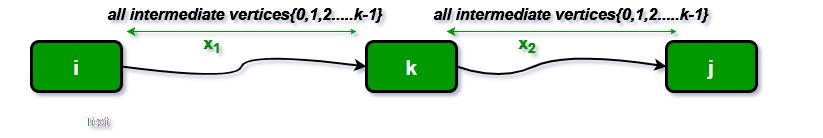

In [15]:
# mber of vertices in the graph
V = 4

# Define infinity as the large
# enough value. This value will be
# used for vertices not connected to each other
INF = 99999

# Solves all pair shortest path
# via Floyd Warshall Algorithm


def floydWarshall(dist):
    """dist[][] will be the output
    matrix that will finally
     have the shortest distances
     between every pair of vertices"""
    """ initializing the solution matrix 
    same as input graph matrix
    OR we can say that the initial 
    values of shortest distances
    are based on shortest paths considering no 
    intermediate vertices """

    # dist = list(map(lambda i: list(map(lambda j: j, i)), graph))

    """ Add all vertices one by one 
    to the set of intermediate
     vertices.
     ---> Before start of an iteration, 
     we have shortest distances
     between all pairs of vertices 
     such that the shortest
     distances consider only the 
     vertices in the set 
    {0, 1, 2, .. k-1} as intermediate vertices.
      ----> After the end of a 
      iteration, vertex no. k is
     added to the set of intermediate 
     vertices and the 
    set becomes {0, 1, 2, .. k}
    """
    for k in range(V):

        # pick all vertices as source one by one
        for i in range(V):

            # Pick all vertices as destination for the
            # above picked source
            for j in range(V):

                # If vertex k is on the shortest path from
                # i to j, then update the value of dist[i][j]
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    printSolution(dist)


# A utility function to print the solution
def printSolution(dist):
    print(
        "Following matrix shows the shortest distances\
 between every pair of vertices"
    )
    for i in range(V):
        for j in range(V):
            if dist[i][j] == INF:
                print("%7s" % ("INF"), end=" ")
            else:
                print("%7d\t" % (dist[i][j]), end=" ")
            if j == V - 1:
                print()


# Driver's code
if __name__ == "__main__":
    """
                10
           (0)------->(3)
            |         /|\
          5 |          |
            |          | 1
           \|/         |
           (1)------->(2)
                3           """
    graph = [[0, 5, INF, 10], [INF, 0, 3, INF], [INF, INF, 0, 1], [INF, INF, INF, 0]]
    # Function call
    floydWarshall(graph)

Following matrix shows the shortest distances between every pair of vertices
      0	       5	       8	       9	 
    INF       0	       3	       4	 
    INF     INF       0	       1	 
    INF     INF     INF       0	 


**Dijkstra’s Algorithm**

Given a weighted graph and a source vertex in the graph, find the shortest paths from the source to all the other vertices in the given graph.

Note: The given graph does not contain any negative edge

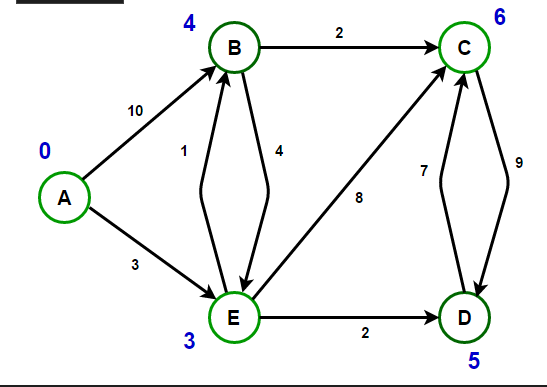

 O(E + V)*Log V

In [3]:
import sys
from heapq import heappop, heappush


# A class to store a heap node
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight

    # Override the __lt__() function to make `Node` class work with a min-heap
    def __lt__(self, other):
        return self.weight < other.weight


# A class to represent a graph object
class Graph:
    def __init__(self, edges, n):
        # allocate memory for the adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for source, dest, weight in edges:
            self.adjList[source].append((dest, weight))


def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)


def get_path(parent, vertex, path):
    while vertex != -1:
        path.append(vertex)
        vertex = parent[vertex]
    return path[::-1]


# Run Dijkstra’s algorithm on a given graph
def findShortestPaths(graph, source, n):

    # create a min-heap and push source node having distance 0
    pq = []
    heappush(pq, (0, source))  # Node(source, weight=0)

    # set initial distance from the source to `v` as infinity
    dist = [sys.maxsize] * n

    # distance from the source to itself is zero
    dist[source] = 0

    # list to track vertices for which minimum cost is already found
    done = [False] * n
    done[source] = True

    # stores predecessor of a vertex (to a print path)
    prev = [-1] * n

    # run till min-heap is empty
    while pq:

        _, node = heappop(pq)  # Remove and return the best vertex
        u = node  # get the vertex number

        # do for each neighbor `v` of `u`
        for v, weight in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:  # Relaxation step
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, (dist[v], v))  # Node(v, dist[v])

        # mark vertex `u` as done so it will not get picked up again
        done[u] = True

    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f"Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}")
            route.clear()


if __name__ == "__main__":

    # initialize edges as per the above diagram
    # (u, v, w) represent edge from vertex `u` to vertex `v` having weight `w`
    edges = [
        (0, 1, 10),
        (0, 4, 3),
        (1, 2, 2),
        (1, 4, 4),
        (2, 3, 9),
        (3, 2, 7),
        (4, 1, 1),
        (4, 2, 8),
        (4, 3, 2),
    ]
    # O(E.log(V))
    # total number of nodes in the graph (labelled from 0 to 4)
    n = 5

    # construct graph
    graph = Graph(edges, n)

    # run the Dijkstra’s algorithm from every node
    # for source in range(n):
    findShortestPaths(graph, 0, n)

Path (0 —> 1): Minimum cost = 4, Route = [0, 4, 1]
Path (0 —> 2): Minimum cost = 6, Route = [0, 4, 1, 2]
Path (0 —> 3): Minimum cost = 5, Route = [0, 4, 3]
Path (0 —> 4): Minimum cost = 3, Route = [0, 4]


0-1 BFS (Shortest Path in a Binary Weight Graph)

Given a graph where every edge has weight as either 0 or 1. 

A source vertex is also given in the graph. Find the shortest path from the source vertex to every other vertex. 

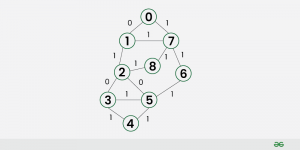

In [42]:
# Python3 program to implement single source
# shortest path for a Binary Graph
from sys import maxsize as INT_MAX
from collections import deque

# no.of vertices
V = 9


# a structure to represent edges
class node:
    def __init__(self, to, weight):

        # two variable one denote the node
        # and other the weight
        self.to = to
        self.weight = weight


# vector to store edges
edges = [0] * V
for i in range(V):
    edges[i] = []


def get_path(parent, vertex):
    path = []
    while vertex != -1:
        path.append(vertex)
        vertex = parent[vertex]
    return path[::-1]


# Prints shortest distance from
# given source to every other vertex
def zeroOneBFS(src: int):

    # Initialize distances from given source
    dist = [0] * V
    for i in range(V):
        dist[i] = INT_MAX

    # double ende queue to do BFS.
    Q = deque()
    dist[src] = 0
    Q.append(src)
    prev = [-1] * V
    done = [False] * V
    done[src] = True
    while Q:
        u = Q[0]
        Q.popleft()

        for v, w in edges[u]:

            # checking for the optimal distance
            # for v, weight in graph.adjList[u]:
            # if not done[v] and (dist[u] + weight) < dist[v]:  # Relaxation step
            #     dist[v] = dist[u] + weight
            #     prev[v] = u
            if not done[v] and dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u

                # Put 0 weight edges to front and 1 weight
                # edges to back so that vertices are processed
                # in increasing order of weights.
                if w == 0:
                    Q.appendleft(v)
                else:
                    Q.append(v)
        done[u] = True

    # printing the shortest distances
    for i in range(V):
        print(
            f"The distance of vertex {i} from vertex {src} is {dist[i]}. "
            f"Its path is",
            get_path(prev, i),
        )
    #     print(dist[i], end=" ")
    # print()


def addEdge(u: int, v: int, wt: int):
    edges[u].append((v, wt))
    # edges[u].append(node(v, wt))


# Driver Code
if __name__ == "__main__":
    V = 9
    edges = [0] * V
    for i in range(V):
        edges[i] = []

    addEdge(0, 1, 0)
    addEdge(0, 7, 1)
    addEdge(1, 7, 1)
    addEdge(1, 2, 1)
    addEdge(2, 3, 0)
    addEdge(2, 5, 0)
    addEdge(2, 8, 1)
    addEdge(3, 4, 1)
    addEdge(3, 5, 1)
    addEdge(4, 5, 1)
    addEdge(5, 6, 1)
    addEdge(6, 7, 1)
    addEdge(7, 8, 1)
    # graph = Graph(edges, n)

    # source node
    src = 0
    zeroOneBFS(src)

The distance of vertex 0 from vertex 0 is 0. Its path is [0]
The distance of vertex 1 from vertex 0 is 0. Its path is [0, 1]
The distance of vertex 2 from vertex 0 is 1. Its path is [0, 1, 2]
The distance of vertex 3 from vertex 0 is 1. Its path is [0, 1, 2, 3]
The distance of vertex 4 from vertex 0 is 2. Its path is [0, 1, 2, 3, 4]
The distance of vertex 5 from vertex 0 is 1. Its path is [0, 1, 2, 5]
The distance of vertex 6 from vertex 0 is 2. Its path is [0, 1, 2, 5, 6]
The distance of vertex 7 from vertex 0 is 1. Its path is [0, 7]
The distance of vertex 8 from vertex 0 is 2. Its path is [0, 7, 8]


**Shortes path in DAG**

For a general weighted graph, we can calculate single source shortest distances in O(VE) time using Bellman–Ford Algorithm.

For a graph with no negative weights, we can do better and calculate single source shortest distances in O(E + V)*LogV time using Dijkstra’s algorithm. 

Can we do even better for Directed Acyclic Graph (DAG)? We can calculate single source shortest distances in O(V+E) time for DAGs. 

The idea is to use Topological Sorting.

We know that a Topological sort of a directed acyclic graph is a linear ordering of its vertices such that for every 

directed edge uv from vertex u to vertex v, u comes before v in the ordering

O(V+E)

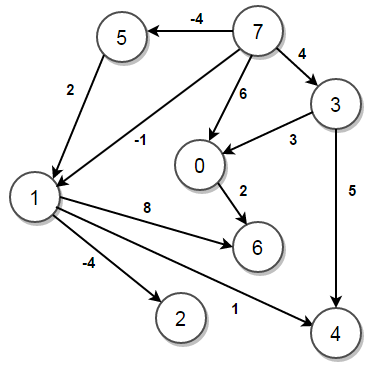

In [14]:
from collections import defaultdict


# Graph is represented using adjacency list. Every
# node of adjacency list contains vertex number of
# the vertex to which edge connects. It also contains
# weight of the edge
class Graph:
    def __init__(self, vertices):

        self.V = vertices  # No. of vertices

        # dictionary containing adjacency List
        self.graph = defaultdict(list)

    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph[u].append((v, w))

    # A recursive function used by shortestPath
    def topologicalSortUtil(self, v, visited, stack):

        # Mark the current node as visited.
        visited[v] = True

        # Recur for all the vertices adjacent to this vertex
        if v in self.graph.keys():
            for node, weight in self.graph[v]:
                if visited[node] == False:
                    self.topologicalSortUtil(node, visited, stack)

        # Push current vertex to stack which stores topological sort
        stack.append(v)

    """ The function to find shortest paths from given vertex.
        It uses recursive topologicalSortUtil() to get topological
        sorting of given graph ."""

    def get_path(self, parent, vertex):
        path = []
        while vertex != -1:
            path.append(vertex)
            vertex = parent[vertex]
        return path[::-1]

    def shortestPath(self, s):

        # Mark all the vertices as not visited
        visited = [False] * self.V
        stack = []

        # Call the recursive helper function to store Topological
        # Sort starting from source vertices
        for i in range(self.V):
            if visited[i] == False:
                self.topologicalSortUtil(s, visited, stack)

        # Initialize distances to all vertices as infinite and
        # distance to source as 0
        dist = [float("Inf")] * (self.V)
        dist[s] = 0
        self.parent = [-1] * self.V
        done = [False] * self.V
        done[s] = True
        # Process vertices in topological order
        while stack:

            # Get the next vertex from topological order
            i = stack.pop()

            # Update distances of all adjacent vertices
            for node, weight in self.graph[i]:
                if not done[node] and dist[node] > dist[i] + weight:
                    dist[node] = dist[i] + weight
                    self.parent[node] = i
            done[i] = True

        # Print the calculated shortest distances
        for i in range(self.V):
            print(
                f"The distance of vertex {i} from vertex {s} is {dist[i]}. "
                f"Its path is",
                self.get_path(self.parent, i),
            )
            # print(("%d" % dist[i]) if dist[i] != float("Inf") else "Inf", end=" ")


g = Graph(8)
edges = [
    (0, 6, 2),
    (1, 2, -4),
    (1, 4, 1),
    (1, 6, 8),
    (3, 0, 3),
    (3, 4, 5),
    (5, 1, 2),
    (7, 0, 6),
    (7, 1, -1),
    (7, 3, 4),
    (7, 5, -4),
]

# total number of nodes in the graph (labelled from 0 to 7)
n = 8
for u, v, w in edges:
    g.addEdge(u, v, w)
# g.addEdge(0, 1, 5)
# g.addEdge(0, 2, 3)
# g.addEdge(1, 3, 6)
# g.addEdge(1, 2, 2)
# g.addEdge(2, 4, 4)
# g.addEdge(2, 5, 2)
# g.addEdge(2, 3, 7)
# g.addEdge(3, 4, -1)
# g.addEdge(4, 5, -2)

# source = 1
s = 7

print("Following are shortest distances from source %d " % s)
g.shortestPath(s)

Following are shortest distances from source 7 
The distance of vertex 0 from vertex 7 is 6. Its path is [7, 0]
The distance of vertex 1 from vertex 7 is -2. Its path is [7, 5, 1]
The distance of vertex 2 from vertex 7 is -6. Its path is [7, 5, 1, 2]
The distance of vertex 3 from vertex 7 is 4. Its path is [7, 3]
The distance of vertex 4 from vertex 7 is -1. Its path is [7, 5, 1, 4]
The distance of vertex 5 from vertex 7 is -4. Its path is [7, 5]
The distance of vertex 6 from vertex 7 is 6. Its path is [7, 5, 1, 6]
The distance of vertex 7 from vertex 7 is 0. Its path is [7]


**Longest path in DAG**

In [2]:
#  A recursive function used by longestPath. See below


def topologicalSortUtil(v):
    global Stack, visited, adj
    visited[v] = True

    # Recur for all the vertices adjacent to this vertex
    # list<AdjListNode>::iterator i
    for i in adj[v]:
        if not visited[i[0]]:
            topologicalSortUtil(i[0])

    # Push current vertex to stack which stores topological
    # sort
    Stack.append(v)


# The function to find longest distances from a given vertex.
# It uses recursive topologicalSortUtil() to get topological
# sorting.
def longestPath(s):
    global Stack, visited, adj, V
    dist = [-(10**9) for i in range(V)]

    # Call the recursive helper function to store Topological
    # Sort starting from all vertices one by one
    for i in range(V):
        if visited[i] == False:
            topologicalSortUtil(i)
    # print(Stack)

    # Initialize distances to all vertices as infinite and
    # distance to source as 0
    dist[s] = 0
    # Stack.append(1)
    done = [False] * V
    done[s] = True

    # Process vertices in topological order
    while len(Stack) > 0:

        # Get the next vertex from topological order
        u = Stack[-1]
        del Stack[-1]
        # print(u)

        # Update distances of all adjacent vertices
        # list<AdjListNode>::iterator i

        for i, w in adj[u]:
            # print(u, i)
            if not done[i] and dist[i] < dist[u] + w:
                dist[i] = dist[u] + w
        done[u] = True

    # Print calculated longest distances
    # print(dist)
    for i in range(V):
        print("INF ", end="") if (dist[i] == -(10**9)) else print(dist[i], end=" ")


# Driver code
if __name__ == "__main__":
    V, Stack, visited = 6, [], [False for i in range(7)]
    adj = [[] for i in range(7)]

    # Create a graph given in the above diagram.
    # Here vertex numbers are 0, 1, 2, 3, 4, 5 with
    # following mappings:
    # 0=r, 1=s, 2=t, 3=x, 4=y, 5=z
    adj[0].append([1, 5])
    adj[0].append([2, 3])
    adj[1].append([3, 6])
    adj[1].append([2, 2])
    adj[2].append([4, 4])
    adj[2].append([5, 2])
    adj[2].append([3, 7])
    adj[3].append([5, 1])
    adj[3].append([4, -1])
    adj[4].append([5, -2])

    s = 1
    print("Following are longest distances from source vertex ", s)
    longestPath(s)

Following are longest distances from source vertex  1
INF 0 2 9 8 10 

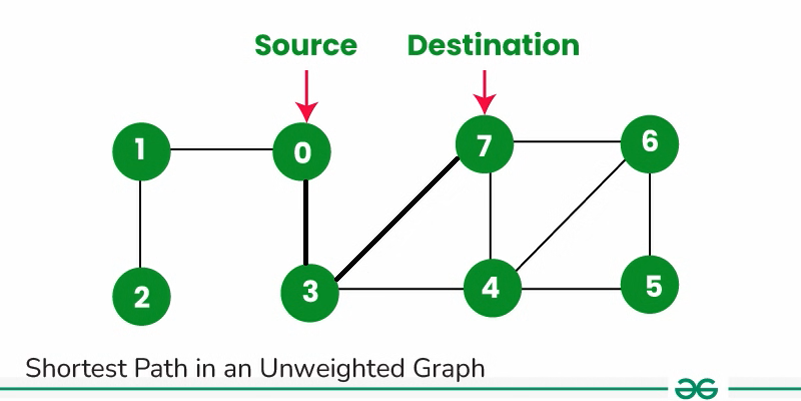

O(V + E)

In [13]:
from collections import deque


def bfs(graph, S, par, dist):
    # Queue to store the nodes in the order they are visited
    q = deque()
    # Mark the distance of the source node as 0
    dist[S] = 0
    # Push the source node to the queue
    q.append(S)
    done = [False] * len(dist)
    done[S] = True

    # Iterate until the queue is not empty
    while q:
        # Pop the node at the front of the queue
        node = q.popleft()

        # Explore all the neighbors of the current node
        for neighbor in graph[node]:
            # Check if the neighboring node is not visited
            if not done[neighbor] and dist[neighbor] > dist[node] + 1:
                # Mark the current node as the parent of the neighboring node
                par[neighbor] = node
                # Mark the distance of the neighboring node as the distance of the current node + 1
                dist[neighbor] = dist[node] + 1
                # Insert the neighboring node to the queue
                q.append(neighbor)
        done[node] = True


def print_shortest_distance(graph, S, D, V):
    # par[] array stores the parent of nodes
    par = [-1] * V

    # dist[] array stores the distance of nodes from S
    dist = [float("inf")] * V

    # Function call to find the distance of all nodes and their parent nodes
    bfs(graph, S, par, dist)

    if dist[D] == float("inf"):
        print("Source and Destination are not connected")
        return

    # List path stores the shortest path
    path = []
    current_node = D
    path.append(D)
    while par[current_node] != -1:
        path.append(par[current_node])
        current_node = par[current_node]

    # Printing path from source to destination
    for i in range(len(path) - 1, -1, -1):
        print(path[i], end=" ")


# Driver program to test above functions
if __name__ == "__main__":
    # no. of vertices
    V = 8
    # Source and Destination vertex
    S, D = 2, 6
    # Edge list
    edges = [
        [0, 1],
        [1, 2],
        [0, 3],
        [3, 4],
        [4, 7],
        [3, 7],
        [6, 7],
        [4, 5],
        [4, 6],
        [5, 6],
    ]

    # List to store the graph as an adjacency list
    graph = [[] for _ in range(V)]

    for edge in edges:
        graph[edge[0]].append(edge[1])
        graph[edge[1]].append(edge[0])

    print_shortest_distance(graph, S, D, V)

2 1 0 3 4 6 

**Bi-partite**

In [ ]:
def isBipartite(gr) -> bool:
    n = len(gr)
    colour = [0] * n

    for node in range(n):
        if colour[node] != 0:
            continue

        q = deque()
        q.append(node)
        colour[node] = 1

        while q:
            cur = q.popleft()

            for ne in gr[cur]:
                if colour[ne] == 0:
                    colour[ne] = -colour[cur]
                    q.append(ne)
                elif colour[ne] != -colour[cur]:
                    return False

    return True


def is_bipartite(adj, color, src):
    q = deque()
    q.append((src, 1))
    color[src] = 1

    while q:
        node, col = q.popleft()

        for neighbor in adj[node]:
            if color[neighbor] == 0:
                color[neighbor] = -col
                q.append((neighbor, -col))
            elif color[neighbor] == col:
                return False


def validColouring(gr, colour, node, col):

    if colour[node] != 0:
        return colour[node] == col

    colour[node] = col
    for ne in gr[node]:

        if not validColouring(gr, colour, ne, -col):

            return False

    return True


def isBipartite(graph) -> bool:

    n = len(graph)

    colour = [0] * n

    for node in range(n):

        if colour[node] == 0 and not validColouring(graph, colour, node, 1):

            return False

    return True

Bipartite using Union-Find

In [4]:
class UnionFind:
    def __init__(self, n):
        self.parent = [*range(n)]
        self.rank = [1] * n

    def find(self, n):
        if self.parent[n] != n:
            self.parent[n] = self.find(self.parent[n])
        return self.parent[n]

    def union(self, a, b):
        a, b = self.find(a), self.find(b)
        if a == b:
            return
        if self.rank[a] < self.rank[b]:
            self.parent[a] = b
        else:
            self.parent[b] = a
            if self.rank[a] == self.rank[b]:
                self.rank[a] += 1
        return


class Solution:
    def isBipartite(self, graph) -> bool:
        uf = UnionFind(len(graph))
        for node, neighbors in enumerate(graph):
            for neighbor in neighbors:
                if uf.find(neighbor) == uf.find(node):
                    return False
                uf.union(neighbors[0], neighbor)
        return True

if sniper A is being defended by sniper B, Ninja has to kill sniper B first, and then only he can kill sniper A.

So, you are given a “defense” array, where each element contains two integers, say A, B, which means sniper B is defended by sniper A. Your task is to find out the minimum time needed to kill each sniper.

In [ ]:
"""
    Time Complexity: O(N + M)
    Space Complexity: O(N + M)

    Where N and M denote the number of snipers and the number of elements in the "defense" array respectively.
"""

from queue import Queue


def minTime(n, m, edges):

    # Create a  graph of n nodes.
    graph = [[] for i in range(n)]

    # Draw directed edges from each sniper who is defending to the one who is being defended.
    for i in range(0, m):
        graph[edges[i][0]].append(edges[i][1])

    indegree = [0 for i in range(n)]

    for i in range(n):
        for j in range(len(graph[i])):
            indegree[graph[i][j]] += 1

    q = Queue()

    ans = [0 for i in range(n)]

    # Push all the nodes to the queue that have a 0 indegree and make ans[i] = 1.
    for i in range(n):
        if indegree[i] == 0:
            q.put(i)
            ans[i] = 1

    while q.qsize() > 0:

        curr = q.get()

        for i in range(len(graph[curr])):

            indegree[graph[curr][i]] -= 1

            # If indegree of the neighbor becomes 0, then push it to the queue.
            if indegree[graph[curr][i]] == 0:
                ans[graph[curr][i]] = ans[curr] + 1
                q.put(graph[curr][i])

    return ans

IndentationError: unexpected indent (2369053174.py, line 37)

**Find maximum cost path in a graph from a given source to a given destination**

Given a weighted undirected graph, find the maximum cost path from a given source to any other vertex in the graph which is

greater than a given cost. The path should not contain any cycles.

modifying BFS, we don’t mean using a priority queue that picks up the maximum weighted edge at every step,

 as that approach will fail. A low-weight edge can also be involved in the maximum cost path as 
 
 there might be higher weight edges connected through it.

 remove visited check from BFS. But if the graph contains a cycle, removing this check will cause the program to go into an infinite loop. 
 
 We can easily handle that if we maintain a list of nodes visited so far in the current path for a node in a queue. 

In [6]:
import sys
from collections import deque


# A class to represent a graph object
class Graph:
    # Graph Constructor
    def __init__(self, edges, n):

        # resize the list to `n` elements
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest, weight in edges:
            self.adjList[src].append((dest, weight))
            self.adjList[dest].append((src, weight))


# Perform BFS on graph `graph` starting from vertex `v`
def findMaxCost(graph, src, k):

    # create a queue for doing BFS
    q = deque()

    # add source vertex to set and enqueue it
    vertices = set([src])

    # (current vertex, current path cost, set of nodes visited so far in
    # the current path)
    q.append((src, 0, vertices))

    # stores maximum cost of a path from the source
    maxcost = -sys.maxsize

    # loop till queue is empty
    while q:

        # dequeue front node
        v, cost, vertices = q.popleft()

        # if the destination is reached and BFS depth is equal to `m`,
        # update the minimum cost calculated so far
        if cost > k:
            maxcost = max(maxcost, cost)

        # do for every adjacent edge of `v`
        for dest, weight in graph.adjList[v]:

            # check for a cycle
            if not dest in vertices:

                # add current node to the path
                s = set(vertices)
                s.add(dest)

                # push every vertex (discovered or undiscovered) into
                # the queue with a cost equal to the
                # parent's cost plus the current edge's weight
                q.append((dest, cost + weight, s))

    # return max-cost
    return maxcost


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6, 11),
        (0, 1, 5),
        (1, 6, 3),
        (1, 5, 5),
        (1, 2, 7),
        (2, 3, -8),
        (3, 4, 10),
        (5, 2, -1),
        (5, 3, 9),
        (5, 4, 1),
        (6, 5, 2),
        (7, 6, 9),
        (7, 1, 6),
    ]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    src = 0
    cost = 50

    # Start modified BFS traversal from source vertex `src`
    max_cost = findMaxCost(graph, src, cost)

    if max_cost != -sys.maxsize:
        print(max_cost)
    else:
        print(f"All paths from source have their costs < {cost}")

51


**Given a digraph (directed graph), find the total number of routes to reach the destination from a given source with exactly m edges.**

if the graph contains a cycle, removing visited check will cause the program to go into an infinite loop.

 We can easily handle that if we don’t consider nodes having a BFS depth of more than m. 

In [5]:
from collections import deque


# O(V.E)
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Perform BFS on graph `graph` starting from vertex `v`
def findTotalPaths(graph, src, dest, m):

    # create a queue for doing BFS
    q = deque()

    # enqueue current vertex and the current depth of BFS
    # (how far away the current node is from the source)
    q.append((src, 0))

    # stores number of paths from source to destination having exactly `m` edges
    count = 0

    # loop till queue is empty
    while q:

        # dequeue front node
        vertex, depth = q.popleft()

        # if the destination is reached and BFS depth is equal to `m`, update count
        if vertex == dest and depth == m:
            count = count + 1

        # don't consider nodes having a BFS depth more than `m`.
        # This check will result in optimized code and handle cycles
        # in the graph (otherwise, the loop will never break)
        if depth > m:
            break

        # do for every adjacent vertex `u` of `v`
        for u in graph.adjList[vertex]:
            # enqueue every vertex (discovered or undiscovered)
            q.append((u, depth + 1))

    # return number of paths from source to destination
    return count


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6),
        (0, 1),
        (1, 6),
        (1, 5),
        (1, 2),
        (2, 3),
        (3, 4),
        (5, 2),
        (5, 3),
        (5, 4),
        (6, 5),
        (7, 6),
        (7, 1),
    ]

    # total number of nodes in the graph
    n = 8

    # construct graph
    graph = Graph(edges, n)

    src, dest = 0, 3
    m = 4

    # Do modified BFS traversal from the source vertex src
    print(findTotalPaths(graph, src, dest, m))

3


**Given a weighted digraph (directed graph), find the least-cost path from a given source to a given destination with exactly m edges.**

In [4]:
import sys
from collections import deque


# A class to represent a graph object
class Graph:
    # Graph Constructor
    def __init__(self, edges, n):

        # resize the list to `n` elements
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest, weight in edges:
            self.adjList[src].append((dest, weight))


# Perform BFS on graph `g` starting from vertex `v`
def findLeastCost(g, src, dest, m):

    # create a queue for doing BFS
    q = deque()

    # enqueue source vertex
    q.append((src, 0, 0))

    # stores least-cost from source to destination
    minCost = sys.maxsize

    # loop till queue is empty
    while q:

        # dequeue front node
        v, depth, cost = q.popleft()

        # if the destination is reached and BFS depth is equal to `m`,
        # update the minimum cost calculated so far
        if v == dest and depth == m:
            minCost = min(minCost, cost)

        # don't consider nodes having a BFS depth more than `m`.
        # This check will result in optimized code and handle cycles
        # in the graph (otherwise, the loop will never break)
        if depth > m:
            break

        # do for every adjacent edge of `v`
        for des, weight in g.adjList[v]:
            # push every vertex (discovered or undiscovered) into
            # the queue with depth as +1 of parent and cost equal
            # to the cost of parent plus the current edge weight
            q.append((des, depth + 1, cost + weight))

    # return least-cost
    return minCost


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 6, -1),
        (0, 1, 5),
        (1, 6, 3),
        (1, 5, 5),
        (1, 2, 7),
        (2, 3, 8),
        (3, 4, 10),
        (5, 2, -1),
        (5, 3, 9),
        (5, 4, 1),
        (6, 5, 2),
        (7, 6, 9),
        (7, 1, 6),
    ]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    g = Graph(edges, n)

    (src, dest) = (0, 3)
    m = 4

    # Perform modified BFS traversal from source vertex `src`
    print(findLeastCost(g, src, dest, m))

8


**Print path between two given node**

In [2]:
from collections import deque


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Function to perform DFS traversal in a directed graph to find the
# complete path between source and destination vertices
def isReachable(graph, src, dest, discovered, path):

    # mark the current node as discovered
    discovered[src] = True

    # include the current node in the path
    path.append(src)

    # if destination vertex is found
    if src == dest:
        return True

    # do for every edge (src, i)
    for i in graph.adjList[src]:

        # if `u` is not yet discovered
        if not discovered[i]:
            # return true if the destination is found
            if isReachable(graph, i, dest, discovered, path):
                return True

    # backtrack: remove the current node from the path
    path.pop()

    # return false if destination vertex is not reachable from src
    return False


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 3),
        (1, 0),
        (1, 2),
        (1, 4),
        (2, 7),
        (3, 4),
        (3, 5),
        (4, 3),
        (4, 6),
        (5, 6),
        (6, 7),
    ]

    # total number of nodes in the graph (labeled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # source and destination vertex
    (src, dest) = (0, 7)

    # List to store the complete path between source and destination
    path = deque()

    # perform DFS traversal from the source vertex to check the connectivity
    # and store path from the source vertex to the destination vertex
    if isReachable(graph, src, dest, discovered, path):
        print(f"Path exists from vertex {src} to vertex {dest}")
        print(f"The complete path is", list(path))
    else:
        print(f"No path exists between vertices {src} and {dest}")

Path exists from vertex 0 to vertex 7
The complete path is [0, 3, 4, 6, 7]


**Union-Find**

Two sets are called disjoint sets if they don’t have any element in common, the intersection of sets is a null set.

We are given 10 individuals say, a, b, c, d, e, f, g, h, i, j

Following are relationships to be added:
a <-> b  
b <-> d
c <-> f
c <-> i
j <-> e
g <-> j

Given queries like whether a is a friend of d or not. We basically need to create following 4 groups and maintain a quickly accessible connection among group items:
G1 = {a, b, d}
G2 = {c, f, i}
G3 = {e, g, j}
G4 = {h}

Partitioning the individuals into different sets according to the groups in which they fall. This method is known as a Disjoint set Union which maintains a collection of Disjoint sets and each set is represented by one of its members.

The efficiency depends heavily on which tree get attached to the other. There are 2 ways in which it can be done. First is Union by Rank, which considers height of the tree as the factor and Second is Union by Size, which considers size of the tree as the factor while attaching one tree to the other .

If the rank of left is less than the rank of right, then it’s best to move left under right, because that won’t change the rank of right (while moving right under left would increase the height). In the same way, if the rank of right is less than the rank of left, then we should move right under left.

If the size of left is less than the size of right, then it’s best to move left under right and increase size of right by size of left. In the same way, if the size of right is less than the size of left, then we should move right under left. and increase size of left by size of right.

**Kruskal’s Minimum Spanning Tree (MST) Algorithm**

A minimum spanning tree (MST) or minimum weight spanning tree for a weighted, connected, undirected graph is a 

spanning tree with a weight less than or equal to the weight of every other spanning tree.

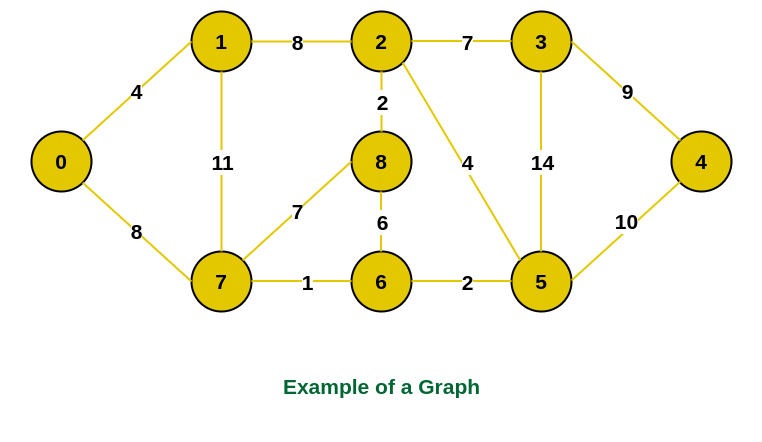

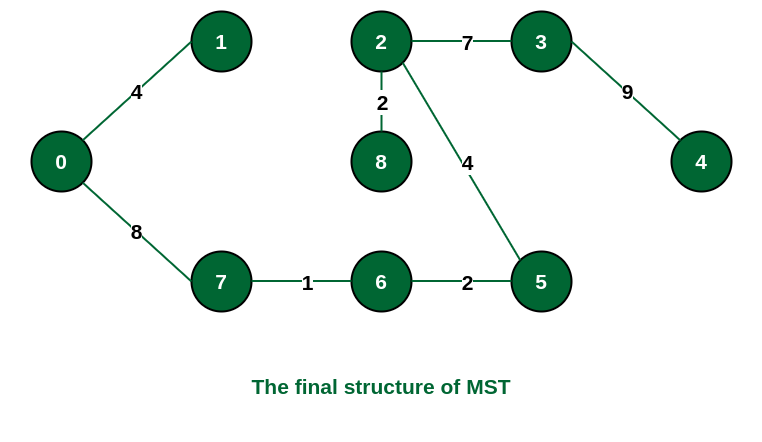

In [ ]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph


# Class to represent a graph
class Graph:

    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    # Function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    # A utility function to find set of an element i
    # (truly uses path compression technique)

    def find(parent, p):
        while parent[p] != p:
            parent[p] = parent[parent[p]]
            p = parent[p]

        return p

    def find(self, parent, k):
        # if `k` is root
        if parent[k] == k:
            return k

        # recur for the parent until we find the root
        return self.find(parent, parent[k])

    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union_rank(self, parent, rank, x, y):

        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x

        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[y] = x
            rank[x] += 1

    def unionBySize(self, Parent, Size, x, y):
        # Find the representatives (or the root nodes) for the set that includes i

        # Get the size of x’s tree
        isize = Size[x]

        # Get the size of y’s tree
        jsize = Size[y]

        # If x’s size is less than y’s size
        if isize < jsize:
            # Then move x under y
            Parent[x] = y

            # Increment y's size by x's size
            Size[y] += Size[x]
        # Else if y’s size is less than x’s size
        else:
            # Then move y under y
            Parent[y] = x

            # Increment x's size by y's size
            Size[x] += Size[y]

    # The main function to construct MST
    # using Kruskal's algorithm
    def KruskalMST(self):

        # This will store the resultant MST
        result = []

        # An index variable, used for sorted edges
        i = 0

        # An index variable, used for result[]
        e = 0

        # Sort all the edges in
        # non-decreasing order of their
        # weight
        self.graph = sorted(self.graph, key=lambda item: item[2])

        parent = []
        rank = []
        Size = []

        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
            Size.append(1)

        # Number of edges to be taken is less than to V-1
        while e < self.V - 1:

            # Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            # If including this edge doesn't
            # cause cycle, then include it in result
            # and increment the index of result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                # self.unionBySize(parent, Size, x, y)
                self.union_rank(parent, rank, x, y)
            # Else discard the edge

        minimumCost = 0
        print("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            print("%d -- %d == %d" % (u, v, weight))
        print("Minimum Spanning Tree", minimumCost)


# Driver code
if __name__ == "__main__":
    g = Graph(4)
    g.addEdge(0, 1, 10)
    g.addEdge(0, 2, 6)
    g.addEdge(0, 3, 5)
    g.addEdge(1, 3, 15)
    g.addEdge(2, 3, 4)

    # Function call
    g.KruskalMST()

# Improved by James Graça-Jones

Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19


Given an array of words where each word consists of lowercase English letters, 

wordA is a predecessor of wordB if and only if we can insert exactly one letter anywhere in wordA without changing the order of the other characters

 to make it equal to wordB, the task is to return the length of the longest possible word chain with words chosen from the given list of words.

we find out all the intermediate words of the start word and the words in the given list of dictionary and maintain a map of the intermediate word and a vector of the

 original word (map<string, vector<string>>). For instance, for the word “POON”, the intermediate words are “*OON” , “P*ON”, “PO*N”, “POO*”. 
 
 Then, we perform BFS traversal starting with the start word and push a pair of start word and the distance (pair(word, distance)) to the queue until we reach the target word. 

In [4]:
def wordLadderLength(startWord: str, targetWord: str, wordList: list[str]) -> int:
    # Creating a queue ds of type {word,transitions to reach 'word'}.
    q = deque([(startWord, 1)])

    # Push all values of wordList into a set
    # to make deletion from it easier and in less time complexity.
    st = set(wordList)
    st.discard(startWord)

    while q:
        word, steps = q.popleft()

        # we return the steps as soon as
        # the first occurrence of targetWord is found.
        if word == targetWord:
            return steps

        for i in range(len(word)):
            # Now, replace each character of 'word' with char
            # from a-z then check if 'word' exists in wordList.
            for ch in "abcdefghijklmnopqrstuvwxyz":
                if ch != word[i]:
                    new_word = word[:i] + ch + word[i + 1 :]
                    if new_word in st:
                        st.remove(new_word)
                        q.append((new_word, steps + 1))

    # If there is no transformation sequence possible
    return 0

In [25]:
from typing import List
from collections import deque


def findSequences(beginWord: str, endWord: str, wordList: List[str]) -> List[List[str]]:
    # Initialize the variables
    ans = []  # list to hold the answer
    vis = set(wordList)  # set to keep track of visited words
    usedOnLvl = []  # list to hold the words used on the current level
    q = deque()  # deque to implement the BFS
    q.append([beginWord])  # start the BFS with the initial word
    level = 0  # current level

    # Implement BFS
    while q:
        vec = q.popleft()  # get the first word in the deque
        if len(vec) > level:
            level += 1
            for str in usedOnLvl:
                vis.remove(
                    str
                )  # remove the words used on the current level from the visited set
            usedOnLvl = []  # reset the list of words used on the current level

        last = vec[-1]  # get the last word in the sequence
        if last == endWord:
            if not ans:
                ans.append(vec)  # if the answer is empty, add the sequence
            elif len(ans[0]) == len(vec):
                ans.append(
                    vec
                )  # if the length of the sequence is equal to the first sequence in the answer, add the sequence

        for i in range(len(last)):
            org = last[i]  # store the original character
            for c in "abcdefghijklmnopqrstuvwxyz":
                last = (
                    last[:i] + c + last[i + 1 :]
                )  # replace the current character with a new character
                if last in vis:
                    vec.append(last)  # add the new word to the sequence
                    q.append(vec.copy())  # add the new sequence to the deque
                    vec.pop()  # remove the new word from the sequence
                    usedOnLvl.append(
                        last
                    )  # add the new word to the list of words used on the current level
            last = last[:i] + org + last[i + 1 :]  # restore the original character

    return ans  # return the answer


# Test the function with the given example
wordList = ["poon", "plee", "same", "poie", "plie", "poin", "plea"]
start = "toon"
target = "plea"
ans = findSequences(start, target, wordList)
for a in ans:
    print(*a, f"\nLength of sequence is {len(a)}\n")

toon poon poin poie plie plee plea 
Length of sequence is 7



In [26]:
from collections import deque


def solve(grid):
    # number of rows
    rows = len(grid)
    if rows == 0:  # check if grid is empty
        return -1

    # number of columns
    cols = len(grid[0])

    # keep track of fresh oranges
    fresh_cnt = 0

    # queue with rotten oranges (for BFS)
    rotten = deque()

    # visit each cell in the grid
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 2:
                # add the rotten orange coordinates to the queue
                rotten.append((r, c))
            elif grid[r][c] == 1:
                # update fresh oranges count
                fresh_cnt += 1

    # keep track of minutes passed.
    minutes_passed = 0

    # If there are rotten oranges in the queue and there are still fresh oranges in the grid keep looping
    while rotten and fresh_cnt > 0:

        # update the number of minutes passed
        # it is safe to update the minutes by 1, since we visit oranges level by level in BFS traversal.
        minutes_passed += 1
        n = len(rotten)
        # process rotten oranges on the current level
        for _ in range(n):
            x, y = rotten.popleft()

            # visit all the adjacent cells
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                # calculate the coordinates of the adjacent cell
                xx, yy = x + dx, y + dy
                # ignore the cell if it is out of the grid boundary
                if xx < 0 or xx == rows or yy < 0 or yy == cols:
                    continue
                # ignore the cell if it is empty '0' or visited before '2'
                if grid[xx][yy] == 0 or grid[xx][yy] == 2:
                    continue

                # update the fresh oranges count
                fresh_cnt -= 1

                # mark the current fresh orange as rotten
                grid[xx][yy] = 2

                # add the current rotten to the queue
                rotten.append((xx, yy))
            print(rotten)
        print(minutes_passed, grid)

    # return the number of minutes taken to make all the fresh oranges to be rotten
    # return -1 if there are fresh oranges left in the grid (there were no adjacent rotten oranges to make them rotten)
    return minutes_passed if fresh_cnt == 0 else -1

In [27]:
grid = [[2, 1, 1], [1, 1, 0], [0, 1, 1]]
solve(grid)

deque([(1, 0), (0, 1)])
1 [[2, 2, 1], [2, 1, 0], [0, 1, 1]]
deque([(0, 1), (1, 1)])
deque([(1, 1), (0, 2)])
2 [[2, 2, 2], [2, 2, 0], [0, 1, 1]]
deque([(0, 2), (2, 1)])
deque([(2, 1)])
3 [[2, 2, 2], [2, 2, 0], [0, 2, 1]]
deque([(2, 2)])
4 [[2, 2, 2], [2, 2, 0], [0, 2, 2]]


4

Given the cost of each cell in a 2 - D matrix 'MAT', your task is to find the minimum total cost that you need to spend to reach the Bottom-Right cell if you are starting from the Top-Left cell.

Note:
1) From any cell you can move UP, DOWN, LEFT, or RIGHT.

In [ ]:
import heapq


def solve(mat):
    m, n = len(mat), len(mat[0])
    dist = [[float("inf")] * n for _ in range(m)]
    dist[0][0] = mat[0][0]
    pq = [(mat[0][0], 0, 0)]
    while pq:
        cost, i, j = heapq.heappop(pq)
        if i == m - 1 and j == n - 1:
            return cost
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            xx, yy = i + dx, j + dy
            # ignore the cell if it is out of the grid boundary
            if 0 <= xx < m and 0 <= yy < n and dist[xx][yy] > dist[i][j] + mat[xx][yy]:
                dist[xx][yy] = dist[i][j] + mat[xx][yy]
                heapq.heappush(pq, (dist[xx][yy], xx, yy))
    return dist[m - 1][n - 1]

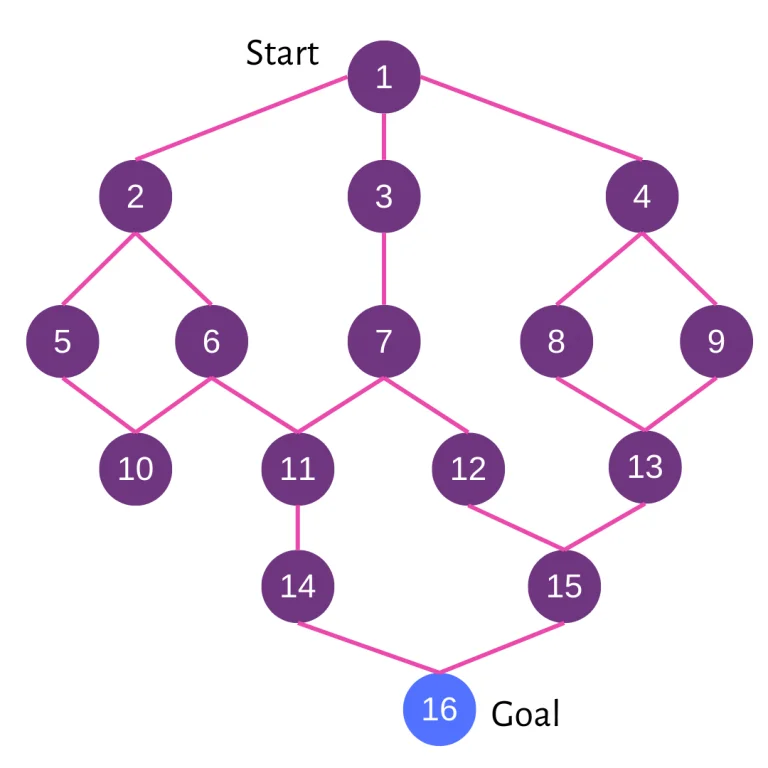

In [6]:
class adjacent_Node:

    def __init__(self, v):

        self.vertex = v
        self.next = None


class bidirectional_Search:

    def __init__(self, vertices):

        self.vertices = vertices
        self.graph = [None] * self.vertices

        self.source_queue = list()
        self.last_node_queue = list()

        self.source_visited = [False] * self.vertices
        self.last_node_visited = [False] * self.vertices

        self.source_parent = [None] * self.vertices
        self.last_node_parent = [None] * self.vertices

    def AddEdge(self, source, last_node):

        node = adjacent_Node(last_node)
        node.next = self.graph[source]
        self.graph[source] = node

        node = adjacent_Node(source)
        node.next = self.graph[last_node]
        self.graph[last_node] = node

    def breadth_fs(self, direction="forward"):

        if direction == "forward":

            current = self.source_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.source_visited[vertex]:
                    self.source_queue.append(vertex)
                    self.source_visited[vertex] = True
                    self.source_parent[vertex] = current

                connected_node = connected_node.next
        else:

            current = self.last_node_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.last_node_visited[vertex]:
                    self.last_node_queue.append(vertex)
                    self.last_node_visited[vertex] = True
                    self.last_node_parent[vertex] = current

                connected_node = connected_node.next

    def is_intersecting(self):

        #
        for i in range(self.vertices):
            if self.source_visited[i] and self.last_node_visited[i]:
                return i
                # break

        return -1

    def path_st(self, intersecting_node, source, last_node):

        path = list()
        path.append(intersecting_node)
        i = intersecting_node

        while i != source:
            path.append(self.source_parent[i])
            i = self.source_parent[i]

        path = path[::-1]
        i = intersecting_node

        while i != last_node:
            path.append(self.last_node_parent[i])
            i = self.last_node_parent[i]

        path = list(map(str, path))

        print(" ".join(path))

    def bidirectional_search(self, source, last_node):

        self.source_queue.append(source)
        self.source_visited[source] = True
        self.source_parent[source] = -1

        self.last_node_queue.append(last_node)
        self.last_node_visited[last_node] = True
        self.last_node_parent[last_node] = -1

        while self.source_queue and self.last_node_queue:

            self.breadth_fs(direction="forward")

            self.breadth_fs(direction="backward")

            intersecting_node = self.is_intersecting()

            if intersecting_node != -1:
                print("Path exists between {} and {}".format(source, last_node))
                print("Intersection at : {}".format(intersecting_node))
                self.path_st(intersecting_node, source, last_node)
                break

        return -1


if __name__ == "__main__":

    n = 17

    source = 1

    last_node = 16

    my_Graph = bidirectional_Search(n)
    my_Graph.AddEdge(1, 2)
    my_Graph.AddEdge(1, 3)
    my_Graph.AddEdge(1, 4)
    my_Graph.AddEdge(2, 5)
    my_Graph.AddEdge(2, 6)
    my_Graph.AddEdge(3, 7)
    my_Graph.AddEdge(4, 8)
    my_Graph.AddEdge(4, 9)
    my_Graph.AddEdge(5, 10)
    my_Graph.AddEdge(6, 10)
    my_Graph.AddEdge(10, 11)
    my_Graph.AddEdge(7, 11)
    my_Graph.AddEdge(7, 12)
    my_Graph.AddEdge(8, 13)
    my_Graph.AddEdge(9, 13)
    my_Graph.AddEdge(10, 6)
    my_Graph.AddEdge(11, 14)
    my_Graph.AddEdge(12, 15)
    my_Graph.AddEdge(13, 15)
    my_Graph.AddEdge(14, 16)
    my_Graph.AddEdge(15, 16)

    out = my_Graph.bidirectional_search(source, last_node)

    # if out == -1:
    #     print("No path between {} and {}".format(source, last_node))

Path exists between 1 and 16
Intersection at : 8
1 4 8 13 15 16


**Find minimum passes required to convert all negative values to postive in a matrix**

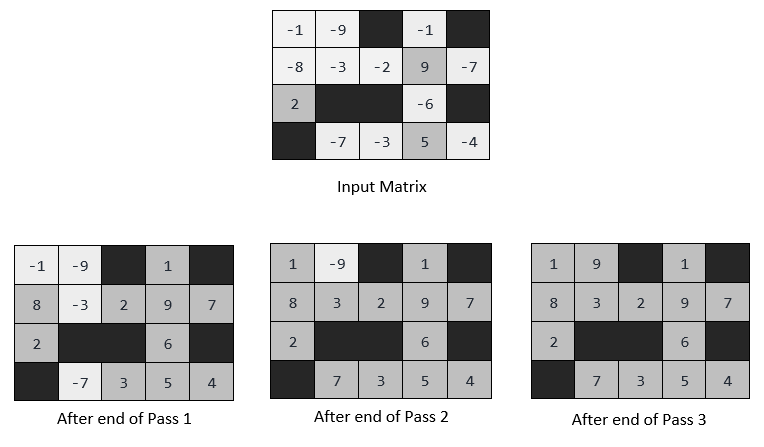

In [25]:
mat = [[-1, -9, 0, -1, 0], [-8, -3, -2, 9, -7], [2, 0, 0, -6, 0], [0, -7, -3, 5, -4]]
r, c = len(mat), len(mat[0])
postive = []
neg = 0
for i in range(r):
    for j in range(c):
        if mat[i][j] > 0:
            postive.append((i, j))
        elif mat[i][j] < 0:
            neg += 1
passes = 0

q = deque(postive)
dx = [-1, 0, 0, 1]
dy = [0, -1, 1, 0]
while q and neg > 0:
    size = len(q)
    for _ in range(size):
        x, y = q.popleft()
        for i in range(4):
            xx = x + dx[i]
            yy = y + dy[i]
            if 0 <= xx < r and 0 <= yy < c and mat[xx][yy] < 0:
                neg -= 1
                mat[xx][yy] = -mat[xx][yy]
                q.append((xx, yy))
    passes += 1
print(neg, passes)

0 3


**Find the shortest path from source to destination in a matrix that satisfies given constraints**

We are allowed to move exactly k steps from any cell in the matrix where k is the cell’s value, i.e., 

from a cell (i, j) having value k in a matrix M, we can move to (i+k, j), (i-k, j), (i, j+k), or (i, j-k). The diagonal moves are not allowed.

In [1]:
from collections import deque


# A queue node used in BFS
class Node:
    # (x, y) represents coordinates of a cell in the matrix
    # maintain a parent node for the printing path
    def __init__(self, x, y, parent=None):
        self.x = x
        self.y = y
        self.parent = parent

    def __repr__(self):
        return str((self.x, self.y))

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y


# Below lists detail all four possible movements from a cell
row = [-1, 0, 0, 1]
col = [0, -1, 1, 0]


# The function returns false if (x, y) is not a valid position
def isValid(x, y, N):
    return (0 <= x < N) and (0 <= y < N)


# Utility function to find path from source to destination
def getPath(node, path=[]):
    if node:
        getPath(node.parent, path)
        path.append(node)


# Find the shortest route in a matrix from source cell (x, y) to
# destination cell (N-1, N-1)
def findPath(matrix, x=0, y=0):
    # base case
    if not matrix or not len(matrix):
        return

    # `N × N` matrix
    N = len(matrix)

    # create a queue and enqueue the first node
    q = deque()
    src = Node(x, y)
    level = 0
    q.append((src, level))

    # set to check if the matrix cell is visited before or not
    visited = set()

    key = (src.x, src.y)
    visited.add(key)

    # loop till queue is empty
    while q:

        # dequeue front node and process it
        curr, level = q.popleft()
        i = curr.x
        j = curr.y

        # return if the destination is found
        if i == N - 1 and j == N - 1:
            path = []
            getPath(curr, path)
            print(level)
            return path

        # value of the current cell
        n = matrix[i][j]

        # check all four possible movements from the current cell
        # and recur for each valid movement
        for k in range(len(row)):
            # get next position coordinates using the value of the current cell
            x = i + row[k] * n
            y = j + col[k] * n

            # check if it is possible to go to the next position
            # from the current position
            if isValid(x, y, N):
                # construct the next cell node
                next = Node(x, y, curr)
                key = (next.x, next.y)

                # if it isn't visited yet
                if key not in visited:
                    # enqueue it and mark it as visited
                    q.append((next, level + 1))
                    visited.add(key)

    # return None if the path is not possible
    return


if __name__ == "__main__":

    matrix = [
        [4, 4, 6, 5, 5, 1, 1, 1, 7, 4],
        [3, 6, 2, 4, 6, 5, 7, 2, 6, 6],
        [1, 3, 6, 1, 1, 1, 7, 1, 4, 5],
        [7, 5, 6, 3, 1, 3, 3, 1, 1, 7],
        [3, 4, 6, 4, 7, 2, 6, 5, 4, 4],
        [3, 2, 5, 1, 2, 5, 1, 2, 3, 4],
        [4, 2, 2, 2, 5, 2, 3, 7, 7, 3],
        [7, 2, 4, 3, 5, 2, 2, 3, 6, 3],
        [5, 1, 4, 2, 6, 4, 6, 7, 3, 7],
        [1, 4, 1, 7, 5, 3, 6, 5, 3, 4],
    ]

    # Find a route in the matrix from source cell (0, 0) to
    # destination cell (N-1, N-1)
    path = findPath(matrix)

    if path:
        print("The shortest path is", path)
    else:
        print("Destination is not found")

6
The shortest path is [(0, 0), (0, 4), (5, 4), (5, 2), (5, 7), (5, 9), (9, 9)]


**DFS  and Memo will work only if there is no Cycle**

In [90]:
mat = [[4, 4, 6, 5, 5, 1, 1, 1, 7, 4], [3, 6, 2, 4, 6, 5, 7, 2, 6, 6]]

row = [-1, 0, 0, 1]
col = [0, -1, 1, 0]


def all_path(src, mat, dp):
    if src in dp:
        return dp[src]

    r, c = len(mat), len(mat[0])
    if src[0] == r - 1 and src[1] == c - 1:
        return 0
    x, y = src
    row = [-1, 0, 0, 1]
    col = [0, -1, 1, 0]
    v = mat[x][y]
    found = float("inf")
    for i in range(4):
        xx = x + row[i] * v
        yy = y + col[i] * v
        if 0 <= xx < r and 0 <= yy < c and (xx, yy) not in dp:
            found = min(found, 1 + all_path((xx, yy), mat, dp))

    dp[src] = found

    return dp[src]


dp = dict()
# all_path((0, 0), mat, dp) error

In [6]:
mat = [
    [4, 4, 6, 5, 5, 1, 1, 1, 7, 4],
    [3, 6, 2, 4, 6, 5, 7, 2, 6, 6],
    [1, 3, 6, 1, 1, 1, 7, 1, 4, 5],
    [7, 5, 6, 3, 1, 3, 3, 1, 1, 7],
    [3, 4, 6, 4, 7, 2, 6, 5, 4, 4],
    [3, 2, 5, 1, 2, 5, 1, 2, 3, 4],
    [4, 2, 2, 2, 5, 2, 3, 7, 7, 3],
    [7, 2, 4, 3, 5, 2, 2, 3, 6, 3],
    [5, 1, 4, 2, 6, 4, 6, 7, 3, 7],
    [1, 4, 1, 7, 5, 3, 6, 5, 3, 4],
]


def all_path(src, mat, visited):
    visited.add(src)

    r, c = len(mat), len(mat[0])
    if src[0] == r - 1 and src[1] == c - 1:
        return True
    x, y = src
    row = [-1, 0, 0, 1]
    col = [0, -1, 1, 0]
    v = mat[x][y]
    ans = 0
    for i in range(4):
        xx = x + row[i] * v
        yy = y + col[i] * v
        if 0 <= xx < r and 0 <= yy < c and (xx, yy) not in visited:
            if all_path((xx, yy), mat, visited):
                return True

    return False
    # visited.discard(src)


all_path((0, 0), mat, set())

True

In [20]:
import sys
from collections import deque

# Below lists detail all four possible movements from a cell
row = [-1, 0, 0, 1]
col = [0, -1, 1, 0]


# Function to check if it is possible to go to position (row, col)
# from the current position. The function returns false if row, col
# is not a valid position or has a value 0 or already visited.
def isValid(mat, visited, row, col):
    return (
        (row >= 0)
        and (row < len(mat))
        and (col >= 0)
        and (col < len(mat[0]))
        and mat[row][col] == 1
        and not visited[row][col]
    )


# A queue node used in BFS
class Node:
    # (x, y) represents coordinates of a cell in the matrix
    # maintain a parent node for the printing path
    def __init__(self, x, y, parent=None):
        self.x = x
        self.y = y
        self.parent = parent

    def __repr__(self):
        return str((self.x, self.y))

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y


# Find the shortest possible route in a matrix `mat` from source `src` to
# destination `dest`
#  Utility function to find path from source to destination
def getPath(node, path=[]):
    if node:
        getPath(node.parent, path)
        path.append(node)


def findShortestPathLength(mat, src, dest):

    # get source cell (i, j)
    i, j = src

    # get destination cell (x, y)
    x, y = dest

    # base case: invalid input
    if not mat or len(mat) == 0 or mat[i][j] == 0 or mat[x][y] == 0:
        return -1

    # `M × N` matrix
    (M, N) = (len(mat), len(mat[0]))

    # construct a matrix to keep track of visited cells
    visited = [[False for x in range(N)] for y in range(M)]

    # create an empty queue
    q = deque()

    # mark the source cell as visited and enqueue the source node
    visited[i][j] = True

    # (i, j, dist) represents matrix cell coordinates, and their
    # minimum distance from the source
    q.append((Node(i, j), 0))

    # stores length of the longest path from source to destination
    min_dist = sys.maxsize

    # loop till queue is empty
    while q:

        # dequeue front node and process it
        (curr, dist) = q.popleft()
        i, j = curr.x, curr.y

        # (i, j) represents a current cell, and `dist` stores its
        # minimum distance from the source

        # if the destination is found, update `min_dist` and stop
        if i == x and j == y:
            path = []
            getPath(curr, path)
            print(path)
            print(dist)
            break

        # check for all four possible movements from the current cell
        # and enqueue each valid movement
        for k in range(4):
            # check if it is possible to go to position
            # (i + row[k], j + col[k]) from current position
            xx = i + row[k]
            yy = j + col[k]
            if isValid(mat, visited, xx, yy):
                # mark next cell as visited and enqueue it
                visited[xx][yy] = True
                q.append((Node(xx, yy, curr), dist + 1))


if __name__ == "__main__":

    mat = [
        [1, 1, 1, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [
            1,
            1,
            1,
            1,
        ],
    ]

    src = (0, 0)
    dest = (3, 3)

    findShortestPathLength(mat=mat, src=src, dest=dest)

    # if min_dist != -1:
    #     print("The shortest path from source to destination has length", min_dist)
    # else:
    #     print("Destination cannot be reached from source")

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
6


In [31]:
mat = [
    [1, 1, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [
        1,
        1,
        1,
        1,
    ],
]

src = (0, 0)
dest = (3, 3)


def print_allpath(src, dest, mat, visited, path):

    if src == dest:
        path.append(dest)
        print(path)
        path.pop()
    row = [-1, 0, 0, 1]
    col = [0, -1, 1, 0]
    x, y = src
    r, c = len(mat), len(mat[0])
    for i in range(4):
        xx = x + row[i]
        yy = y + col[i]
        if 0 <= xx < r and 0 <= yy < c and (xx, yy) not in visited and mat[xx][yy] == 1:
            path.append(src)
            visited.add(src)
            print_allpath((xx, yy), dest, mat, visited, path)
            path.pop()
            visited.discard(src)  # with out this it will print only one path


print_allpath(src, dest, mat, set(), [])

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]
[(0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]


In [7]:
mat = [
    [1, 1, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [
        1,
        1,
        1,
        1,
    ],
]

src = (0, 0)
dest = (3, 3)


def print_allpath(src, dest, mat, visited, path):
    path.append(src)
    visited.add(src)
    if src == dest:

        print(path)
    row = [-1, 0, 0, 1]
    col = [0, -1, 1, 0]
    x, y = src
    r, c = len(mat), len(mat[0])
    for i in range(4):
        xx = x + row[i]
        yy = y + col[i]
        if 0 <= xx < r and 0 <= yy < c and (xx, yy) not in visited and mat[xx][yy] == 1:
            print_allpath((xx, yy), dest, mat, visited, path)
    path.pop()
    visited.discard(src)  # with out this it will print only one path


print_allpath(src, dest, mat, set(), [])

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
[(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]
[(0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]


In [5]:
from collections import deque


# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the directed graph
        for src, dest in edges:
            self.adjList[src].append(dest)


# Function to perform DFS traversal in a directed graph to find the
# complete path between source and destination vertices
def isReachable(graph, src, dest, discovered, path):

    # mark the current node as discovered
    discovered[src] = True

    # include the current node in the path
    path.append(src)

    # if destination vertex is found
    if src == dest:
        print(path)
        # return True

    # do for every edge (src, i)
    for i in graph.adjList[src]:

        # if `u` is not yet discovered
        if not discovered[i]:
            # return true if the destination is found
            isReachable(graph, i, dest, discovered, path)
            # return True

    # backtrack: remove the current node from the path
    path.pop()
    discovered[src] = False  # without this will print only one path

    # return false if destination vertex is not reachable from src
    # return False


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [
        (0, 3),
        (1, 0),
        (1, 2),
        (1, 4),
        (2, 7),
        (3, 4),
        (3, 5),
        (4, 3),
        (4, 6),
        (5, 6),
        (6, 7),
    ]

    # total number of nodes in the graph (labeled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n

    # source and destination vertex
    (src, dest) = (0, 7)

    # List to store the complete path between source and destination
    path = deque()

    # perform DFS traversal from the source vertex to check the connectivity
    # and store path from the source vertex to the destination vertex
    isReachable(graph, src, dest, discovered, path)
    #     print(f"Path exists from vertex {src} to vertex {dest}")
    #     print(f"The complete path is", list(path))
    # else:
    #     print(f"No path exists between vertices {src} and {dest}")

deque([0, 3, 4, 6, 7])
deque([0, 3, 5, 6, 7])


**Find all occurrences of the given string in a character matrix**

In [25]:
# Below lists detail all eight possible movements from a cell
row = [-1, -1, -1, 0, 0, 1, 1, 1]
col = [-1, 0, 1, -1, 1, -1, 0, 1]


def DFS(mat, word, i, j, visited, path, index):
    if index == len(word):
        print(path)
        return
    # check all eight possible movements from the current cell
    # and recur for each valid movement
    for k in range(len(row)):
        # check if it is possible to go to the next position
        # from the current position
        xx, yy = i + row[k], j + col[k]
        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and (xx, yy) not in visited
            # and index < len(word) - 1
            and word[index] == mat[xx][yy]
        ):
            path.append((xx, yy))
            visited.add((xx, yy))
            DFS(mat, word, xx, yy, visited, path, index + 1)
            path.pop()
            visited.discard((xx, yy))

    # backtrack: remove the current cell from the path


def findAllOccurences(mat, word):
    # base case
    if not mat or not len(mat) or not len(word):
        return

    for i in range(len(mat)):
        for j in range(len(mat[0])):
            if mat[i][j] == word[0]:
                visited = set()
                visited.add((i, j))
                path = [(i, j)]
                DFS(mat, word, i, j, visited, path, 1)


if __name__ == "__main__":

    mat = [
        ["D", "E", "M", "X", "B"],
        ["A", "O", "E", "P", "E"],
        ["D", "D", "C", "O", "D"],
        ["E", "B", "E", "D", "S"],
        ["C", "P", "Y", "E", "N"],
    ]
    word = "CODE"

    findAllOccurences(mat, word)

[(2, 2), (1, 1), (0, 0), (0, 1)]
[(2, 2), (1, 1), (2, 0), (3, 0)]
[(2, 2), (1, 1), (2, 1), (1, 2)]
[(2, 2), (1, 1), (2, 1), (3, 0)]
[(2, 2), (1, 1), (2, 1), (3, 2)]
[(2, 2), (2, 3), (2, 4), (1, 4)]
[(2, 2), (2, 3), (3, 3), (3, 2)]
[(2, 2), (2, 3), (3, 3), (4, 3)]


**Find the length of the longest path in a matrix with consecutive characters**

In [37]:
mat = [
    ["D", "E", "H", "X", "B"],
    ["A", "O", "G", "P", "E"],
    ["D", "D", "C", "F", "D"],
    ["E", "B", "E", "A", "S"],
    ["C", "D", "Y", "E", "N"],
]

dx = [-1, -1, -1, 0, 0, 1, 1, 1]
dy = [-1, 0, 1, -1, 1, -1, 0, 1]


def dfs(i, j, mat, prev):
    curr = 1
    for k in range(8):
        xx = i + dx[k]
        yy = j + dy[k]

        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and chr(ord(prev) + 1) == mat[xx][yy]
        ):
            curr = max(curr, 1 + dfs(xx, yy, mat, mat[xx][yy]))
    return curr


# starting character
ch = "C"

print(
    "The length of the longest path with consecutive characters starting from "
    "character",
    ch,
    "is",
    dfs(2, 2, mat, "C"),
)

The length of the longest path with consecutive characters starting from character C is 6


In [42]:
mat = [
    ["D", "E", "H", "X", "B"],
    ["A", "O", "G", "P", "E"],
    ["D", "D", "C", "F", "D"],
    ["E", "B", "E", "A", "S"],
    ["C", "D", "Y", "E", "N"],
]

dx = [-1, -1, -1, 0, 0, 1, 1, 1]
dy = [-1, 0, 1, -1, 1, -1, 0, 1]


def dfs(i, j, mat, prev, path):
    if len(path) >= 5:
        path.append(prev)
        print(path)
    curr = 1
    for k in range(8):
        xx = i + dx[k]
        yy = j + dy[k]

        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and chr(ord(prev) + 1) == mat[xx][yy]
        ):
            path.append(prev)
            curr = max(curr, 1 + dfs(xx, yy, mat, mat[xx][yy], path))
            path.pop()
    return curr


# starting character
ch = "C"

print(
    "The length of the longest path with consecutive characters starting from "
    "character",
    ch,
    "is",
    dfs(2, 2, mat, "C", []),
)

['C', 'D', 'E', 'F', 'G', 'H']
The length of the longest path with consecutive characters starting from character C is 6


In [91]:
# row = [-1, -1, -1, 0, 0, 1, 1, 1]
# col = [-1, 0, 1, -1, 1, -1, 0, 1]
import sys


# check whether cell (x, y) is valid or not
def isValid(x, y, mat):
    return 0 <= x < len(mat) and 0 <= y < len(mat[0])


def dfs(i, j, mat, prev, dp):
    if (i, j, prev) in dp:
        return dp[(i, j, prev)]

    dx = [-1, -1, -1, 0, 0, 1, 1, 1]
    dy = [-1, 0, 1, -1, 1, -1, 0, 1]
    path = None
    for k in range(8):
        xx = i + dx[k]
        yy = j + dy[k]
        if (
            0 <= xx < len(mat)
            and 0 <= yy < len(mat[0])
            and (i, j, prev) not in dp
            and (chr(ord(prev) + 1) == mat[xx][yy])
        ):
            path = dfs(xx, yy, mat, mat[xx][yy], dp)
    dp[(i, j, prev)] = f"{mat[i][j]}, {path}" if path else str(mat[i][j])
    return dp[(i, j, prev)]


# class Solution:
def longestIncreasingPath(mat):
    ans = 1
    dp = dict()
    res_size = -sys.maxsize
    row, col = len(mat), len(mat[0])
    for i in range(row):
        for j in range(col):
            path = dfs(i, j, mat, mat[i][j], dp)

            # find the number of elements involved in the current path
            size = path.count(",")
            # update result if a longer path is found
            if size > res_size:
                result = path  # update the longest path found so far
                res_size = size

    return result


mat = [
    ["D", "E", "H", "X", "B"],
    ["A", "O", "G", "P", "E"],
    ["D", "D", "C", "F", "D"],
    ["E", "B", "E", "A", "S"],
    ["C", "D", "Y", "E", "N"],
]
ans = longestIncreasingPath(mat)
ans

'B, C, D, E, F, G, H'

In [35]:
# input matrix
mat = [
    ["D", "E", "H", "X", "B"],
    ["A", "O", "G", "P", "E"],
    ["D", "D", "C", "F", "D"],
    ["E", "B", "E", "A", "S"],
    ["C", "D", "Y", "E", "N"],
]

# starting character
ch = "C"
r, c = len(mat), len(mat[0])
row = [-1, -1, -1, 0, 0, 1, 1, 1]
col = [-1, 0, 1, -1, 1, -1, 0, 1]
q = deque([((2, 2), 1)])
visited = set()
visited.add((2, 2))
while q:
    curr, l = q.popleft()
    x, y = curr
    print(mat[x][y], l)
    for i in range(8):
        xx = x + row[i]
        yy = y + col[i]
        if (
            0 <= xx < r
            and 0 <= yy < c
            and (xx, yy) not in visited
            and chr(ord(mat[x][y]) + 1) == mat[xx][yy]
        ):
            visited.add((xx, yy))
            q.append(((xx, yy), l + 1))

C 1
D 2
E 3
E 3
F 4
G 5
H 6


In [85]:
# Python program to find minimum Cost Path with
# Left, Right, Bottom and Up moves allowed
import heapq


# Function to check if cell is valid.
def isValidCell(i, j, n):
    return i >= 0 and i < n and j >= 0 and j < n


def minimumCostPath(grid):
    n = len(grid)

    # Min heap to implement Dijkstra
    pq = []

    # 2D grid to store minimum cost
    # to reach every cell.
    cost = [[float("inf")] * n for _ in range(n)]
    cost[0][0] = grid[0][0]

    # Direction vector to move in 4 directions
    dir = [[-1, 0], [1, 0], [0, -1], [0, 1]]

    heapq.heappush(pq, [grid[0][0], 0, 0])

    while pq:
        c, i, j = heapq.heappop(pq)

        # Check for all 4 neighbouring cells.
        for d in dir:
            x, y = i + d[0], j + d[1]

            # If cell is valid and cost to reach this cell
            # from current cell is less
            if isValidCell(x, y, n) and cost[i][j] + grid[x][y] < cost[x][y]:

                # Update cost to reach this cell.
                cost[x][y] = cost[i][j] + grid[x][y]

                # Push the cell into heap.
                heapq.heappush(pq, [cost[x][y], x, y])

    # Return minimum cost to
    # reach bottom right cell.
    return cost[n - 1][n - 1]


if __name__ == "__main__":
    grid = [[9, 4, 9, 9], [6, 7, 6, 4], [8, 3, 3, 7], [7, 4, 9, 10]]

    print(minimumCostPath(grid))

43


In [89]:
grid = [[9, 4, 9, 9], [6, 7, 6, 4], [8, 3, 3, 7], [7, 4, 9, 10]]
dirs = [[-1, 0], [1, 0], [0, -1], [0, 1]]


def isValidCell(i, j, n):
    return i >= 0 and i < n and j >= 0 and j < n


def solve(grid, i, j, n, dp, path):

    if i == n - 1 and j == n - 1:
        path.append(grid[i][j])
        print(path, sum(path))
        path.pop()

    for d in dirs:
        x, y = i + d[0], j + d[1]

        # If cell is valid and cost to reach this cell
        # from current cell is less
        if isValidCell(x, y, n) and dp[x][y] != True:
            path.append(grid[i][j])
            dp[i][j] = True
            solve(grid, x, y, n, dp, path)
            path.pop()
            dp[i][j] = False

    # dp[i][j] = curr
    # return dp[i][j]


n = len(grid)
dp = [[False] * n for _ in range(n)]
# solve(grid, 0, 0, n, dp, [])

In [24]:
# longest increasing path
def dfs(i, j, mat, prev):

    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
    curr = 1

    for k in range(4):
        xx = i + dx[k]
        yy = j + dy[k]
        if 0 <= xx < len(mat) and 0 <= yy < len(mat[0]) and prev < mat[xx][yy]:
            curr = max(curr, 1 + dfs(xx, yy, mat, mat[xx][yy]))

    return curr

In [25]:
ans = 1
mat = [[1, 2, 9], [5, 3, 8], [4, 6, 7]]
row, col = len(mat), len(mat[0])
for i in range(row):
    for j in range(col):
        out = dfs(i, j, mat, mat[i][j])
        print(out, mat[i][j])

7 1
6 2
1 9
1 5
5 3
2 8
5 4
4 6
3 7


In [141]:
mat = [3, 4, 5], [3, 2, 6], [2, 2, 1]
# longest increasing path
m, n = len(mat), len(mat[0])
dirs = [[0, 1], [0, -1], [1, 0], [-1, 0]]

In [142]:
from collections import deque


class Node:
    def __init__(self, x, y, parent=None) -> None:
        self.x = x
        self.y = y
        self.parent = parent

In [143]:
from collections import deque


class Node:
    def __init__(self, x, y, parent=None) -> None:
        self.x = x
        self.y = y
        self.parent = parent


def solve_bfs(x, y):
    q = deque([(1, mat[x][y], Node(x, y))])
    ans = -1
    ansnode = None
    while q:
        size, prev, curr = q.popleft()
        print(size, prev)
        i, j = curr.x, curr.y
        if ans < size:
            ans = size
            ansnode = curr
        for x_, y_ in dirs:
            xx = i + x_
            yy = j + y_
            if 0 <= xx < m and 0 <= yy < n and prev < mat[xx][yy]:
                newnode = Node(xx, yy, curr)
                q.append((size + 1, mat[xx][yy], newnode))
    return size, ansnode

In [150]:
size, out = solve_bfs(0, 2)

1 5
2 6


In [152]:
while out:
    print(mat[out.x][out.y])
    out = out.parent

6
5


**All path from (0,0) to (m-1,n-1) passsing from 1**

In [8]:
grid = [[1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 0], [0, 1, 1, 1]]
dx = [1, 0, -1, 0]
dy = [0, 1, 0, -1]
dirs = ["D", "R", "U", "L"]
row, col = len(grid), len(grid[0])
visited = [[False for _ in range(col)] for _ in range(row)]

In [14]:
def solve(i, j, grid, visited, path):
    if i == len(grid) - 1 and j == len(grid[0]) - 1:
        print(path)
        return
    for k in range(4):
        xx = i + dx[k]
        yy = j + dy[k]
        direction = dirs[k]
        if (
            0 <= xx < len(grid)
            and 0 <= yy < len(grid[0])
            and grid[xx][yy] == 1
            and visited[xx][yy] == False
        ):
            visited[i][j] = True
            path.append(direction)
            solve(xx, yy, grid, visited, path)
            visited[i][j] = False
            path.pop()

In [15]:
solve(0, 0, grid, visited, [])

['D', 'D', 'R', 'D', 'R', 'R']
['D', 'R', 'D', 'D', 'R', 'R']


Given an undirected tree, we need to find the longest path of this tree where a path is defined as a sequence of nodes

This problem is the same as the diameter of the n-ary tree.

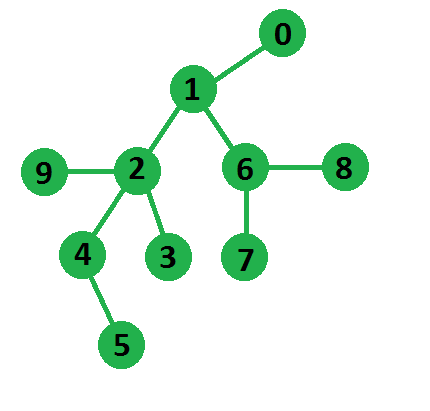

In below tree longest path is of length 5
from node 5 to node 7

In [ ]:
# Python program to find the Longest Path of the Tree
# By Aaditya Upadhyay

from collections import deque


class Graph:

    # Initialisation of graph
    def __init__(self, vertices):

        # No. of vertices
        self.vertices = vertices

        # adjacency list
        self.adj = {i: [] for i in range(self.vertices)}

    def addEdge(self, u, v):
        # add u to v's list
        self.adj[u].append(v)
        # since the graph is undirected
        self.adj[v].append(u)

    # method return farthest node and its distance from node u
    def BFS(self, u):
        # marking all nodes as unvisited
        visited = [False for i in range(self.vertices + 1)]
        # mark all distance with -1
        distance = [-1 for i in range(self.vertices + 1)]

        # distance of u from u will be 0
        distance[u] = 0
        # in-built library for queue which performs fast operations on both the ends
        queue = deque()
        queue.append(u)
        # mark node u as visited
        visited[u] = True

        while queue:

            # pop the front of the queue(0th element)
            front = queue.popleft()
            # loop for all adjacent nodes of node front

            for i in self.adj[front]:
                if not visited[i]:
                    # mark the ith node as visited
                    visited[i] = True
                    # make distance of i , one more than distance of front
                    distance[i] = distance[front] + 1
                    # Push node into the stack only if it is not visited already
                    queue.append(i)

        maxDis = 0

        # get farthest node distance and its index
        for i in range(self.vertices):
            if distance[i] > maxDis:

                maxDis = distance[i]
                nodeIdx = i

        return nodeIdx, maxDis

    # method prints longest path of given tree
    def LongestPathLength(self):

        # first DFS to find one end point of longest path
        node, Dis = self.BFS(0)

        # second DFS to find the actual longest path
        node_2, LongDis = self.BFS(node)

        print("Longest path is from", node, "to", node_2, "of length", LongDis)


# create a graph given in the example

G = Graph(10)
G.addEdge(0, 1)
G.addEdge(1, 2)
G.addEdge(2, 3)
G.addEdge(2, 9)
G.addEdge(2, 4)
G.addEdge(4, 5)
G.addEdge(1, 6)
G.addEdge(6, 7)
G.addEdge(6, 8)

G.LongestPathLength()

In [ ]:
# Python3 implementation to
# find LCA in a tree
MAXN = 1001

# stores depth for each node
depth = [0 for i in range(MAXN)]

# stores first parent for each node
parent = [0 for i in range(MAXN)]

adj = [[] for i in range(MAXN)]


def addEdge(u, v):

    adj[u].append(v)
    adj[v].append(u)


def dfs(cur, prev):

    # marking parent for
    # each node
    parent[cur] = prev

    # marking depth for
    # each node
    depth[cur] = depth[prev] + 1

    # propagating marking down
    # the tree
    for i in range(len(adj[cur])):
        if adj[cur][i] != prev:
            dfs(adj[cur][i], cur)


def preprocess():

    # a dummy node
    depth[0] = -1

    # precalculating 1)depth.
    # 2)parent. for each node
    dfs(1, 0)


# Time Complexity : O(Height of tree)
# recursively jumps one node above
# till both the nodes become equal
def LCANaive(u, v):

    if u == v:
        return u

    if depth[u] > depth[v]:
        u, v = v, u

    v = parent[v]
    return LCANaive(u, v)


# Driver code
if __name__ == "__main__":

    # adding edges to the tree
    addEdge(1, 2)
    addEdge(1, 3)
    addEdge(1, 4)
    addEdge(2, 5)
    addEdge(2, 6)
    addEdge(3, 7)
    addEdge(4, 8)
    addEdge(4, 9)
    addEdge(9, 10)
    addEdge(9, 11)
    addEdge(7, 12)
    addEdge(7, 13)

    preprocess()

    print("LCA(11,8) : " + str(LCANaive(11, 8)))
    print("LCA(3,13) : " + str(LCANaive(3, 13)))

**BFS/DFS problems**

Flood Fill

 Given a coordinate (sr, sc) representing the starting pixel (row and column) of the flood fill, and a pixel value newColor, "flood fill" the image.

In [1]:
class Solution:
    def dfs(self, row, col, ans, image, newColor, delRow, delCol, iniColor):
        # color with new color
        ans[row][col] = newColor
        n = len(image)
        m = len(image[0])
        # there are exactly 4 neighbours
        for i in range(4):
            nrow = row + delRow[i]
            ncol = col + delCol[i]
            # check for valid coordinate
            # then check for same initial color and unvisited pixel
            if (
                0 <= nrow < n
                and 0 <= ncol < m
                and image[nrow][ncol] == iniColor
                and ans[nrow][ncol] != newColor
            ):
                self.dfs(nrow, ncol, ans, image, newColor, delRow, delCol, iniColor)

    def floodFill(self, image, sr, sc, newColor):
        # get initial color
        iniColor = image[sr][sc]
        ans = [row[:] for row in image]
        # delta row and delta column for neighbours
        delRow = [-1, 0, 1, 0]
        delCol = [0, 1, 0, -1]
        self.dfs(sr, sc, ans, image, newColor, delRow, delCol, iniColor)
        return ans


if __name__ == "__main__":
    image = [[1, 1, 1], [1, 1, 0], [1, 0, 1]]

    # sr = 1, sc = 1, newColor = 2
    obj = Solution()
    ans = obj.floodFill(image, 1, 1, 2)
    for i in ans:
        print(" ".join(map(str, i)))

2 2 2
2 2 0
2 0 1


Given a binary grid of N*M. Find the distance of the nearest 1 in the grid for each cell.

The distance is calculated as |i1  - i2| + |j1 - j2|, where i1, j1 are the row number and column number of the current cell, and i2, j2 are the row number and column number of the nearest cell having value 1.

sorted distance- use BFS

**Apporch**: |i1  - i2| + |j1 - j2|will be same for going 1 ceel to another adjacent all dirction will have same value we can use queue in place of heapq

In [2]:
from collections import deque


class Solution:
    # Function to find the distance of nearest 1 in the grid for each cell.
    def nearest(self, grid):
        n = len(grid)
        m = len(grid[0])
        # visited and distance matrix
        vis = [[0] * m for _ in range(n)]
        dist = [[0] * m for _ in range(n)]
        # <coordinates, steps>
        q = deque()
        # traverse the matrix
        for i in range(n):
            for j in range(m):
                # start BFS if cell contains 1
                if grid[i][j] == 1:
                    q.append(((i, j), 0))
                    vis[i][j] = 1
                else:
                    # mark unvisited
                    vis[i][j] = 0

        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]

        # traverse till queue becomes empty
        while q:
            (row, col), steps = q.popleft()
            dist[row][col] = steps
            # for all 4 neighbours
            for i in range(4):
                nrow = row + delrow[i]
                ncol = col + delcol[i]
                # check for valid unvisited cell
                if 0 <= nrow < n and 0 <= ncol < m and vis[nrow][ncol] == 0:
                    vis[nrow][ncol] = 1
                    q.append(((nrow, ncol), steps + 1))
        # return distance matrix
        return dist


if __name__ == "__main__":
    grid = [[0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1]]

    obj = Solution()
    ans = obj.nearest(grid)

    for i in ans:
        print(" ".join(map(str, i)))

1 0 0 1
0 0 1 1
1 1 0 0


Given a matrix mat of size N x M where every element is either ‘O’ or ‘X’. Replace all ‘O’ with ‘X’ that is surrounded by ‘X’. An ‘O’ (or a set of ‘O’) is considered to be surrounded by ‘X’ if there are ‘X’ at locations just below, just above just left, and just right of it.

We can follow either of the traversal techniques as long as we are starting with a boundary element and marking all those Os connected to it. We will be solving it using DFS traversal, but you can apply BFS traversal as well. 

When all the boundaries are traversed and corresponding sets of ‘O’s are marked as visited, they cannot be replaced with ‘X’. All the other remaining unvisited ‘O’s are replaced with ‘X’. This can be done in the same input matrix as the problem talks about replacing the values, otherwise tampering with data is not advised. 

In [3]:
class Solution:
    def dfs(self, row, col, vis, mat, delrow, delcol):
        vis[row][col] = 1
        n = len(mat)
        m = len(mat[0])

        # check for top, right, bottom, left
        for i in range(4):
            nrow = row + delrow[i]
            ncol = col + delcol[i]
            # check for valid coordinates and unvisited Os
            if (
                0 <= nrow < n
                and 0 <= ncol < m
                and not vis[nrow][ncol]
                and mat[nrow][ncol] == "O"
            ):
                self.dfs(nrow, ncol, vis, mat, delrow, delcol)

    def fill(self, n, m, mat):
        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]
        vis = [[0] * m for _ in range(n)]

        # traverse first row and last row
        for j in range(m):
            # check for unvisited Os in the boundary rows
            # first row
            if not vis[0][j] and mat[0][j] == "O":
                self.dfs(0, j, vis, mat, delrow, delcol)

            # last row
            if not vis[n - 1][j] and mat[n - 1][j] == "O":
                self.dfs(n - 1, j, vis, mat, delrow, delcol)

        for i in range(n):
            # check for unvisited Os in the boundary columns
            # first column
            if not vis[i][0] and mat[i][0] == "O":
                self.dfs(i, 0, vis, mat, delrow, delcol)

            # last column
            if not vis[i][m - 1] and mat[i][m - 1] == "O":
                self.dfs(i, m - 1, vis, mat, delrow, delcol)

        # if unvisited O then convert to X
        for i in range(n):
            for j in range(m):
                if not vis[i][j] and mat[i][j] == "O":
                    mat[i][j] = "X"

        return mat


if __name__ == "__main__":
    mat = [
        ["X", "X", "X", "X"],
        ["X", "O", "X", "X"],
        ["X", "O", "O", "X"],
        ["X", "O", "X", "X"],
        ["X", "X", "O", "O"],
    ]

    ob = Solution()
    # n = 5, m = 4
    ans = ob.fill(5, 4, mat)
    for i in range(5):
        for j in range(4):
            print(ans[i][j], end=" ")
        print()

X X X X 
X X X X 
X X X X 
X X X X 
X X O O 


 You are given an N x M binary matrix grid, where 0 represents a sea cell and 1 represents a land cell. A move consists of walking from one land cell to another adjacent (4-directionally) land cell or walking off the boundary of the grid. Find the number of land cells in the grid for which we cannot walk off the boundary of the grid in any number of moves.

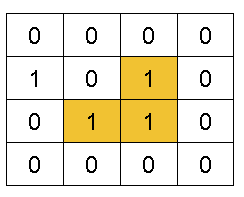

In [4]:
from collections import deque


class Solution:
    def numberOfEnclaves(self, grid):
        q = deque()
        n = len(grid)
        m = len(grid[0])
        vis = [[0] * m for _ in range(n)]

        # traverse boundary elements
        for i in range(n):
            for j in range(m):
                # first row, first col, last row, last col
                if i == 0 or j == 0 or i == n - 1 or j == m - 1:
                    # if it is a land then store it in queue
                    if grid[i][j] == 1:
                        q.append((i, j))
                        vis[i][j] = 1

        delrow = [-1, 0, 1, 0]
        delcol = [0, 1, 0, -1]

        while q:
            row, col = q.popleft()

            # traverses all 4 directions
            for i in range(4):
                nrow = row + delrow[i]
                ncol = col + delcol[i]
                # check for valid coordinates and for land cell
                if (
                    0 <= nrow < n
                    and 0 <= ncol < m
                    and vis[nrow][ncol] == 0
                    and grid[nrow][ncol] == 1
                ):
                    q.append((nrow, ncol))
                    vis[nrow][ncol] = 1

        cnt = 0
        for i in range(n):
            for j in range(m):
                # check for unvisited land cell
                if grid[i][j] == 1 and vis[i][j] == 0:
                    cnt += 1
        return cnt


if __name__ == "__main__":
    grid = [[0, 0, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]

    obj = Solution()
    print(obj.numberOfEnclaves(grid))

3


A directed graph of V vertices and E edges is given in the form of an adjacency list adj. Each node of the graph is labeled with a distinct integer in the range 0 to V - 1. A node is a terminal node if there are no outgoing edges. A node is a safe node if every possible path starting from that node leads to a terminal node. You have to return an array containing all the safe nodes of the graph. The answer should be sorted in ascending order.


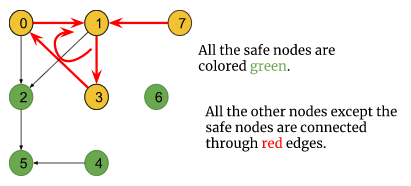

The node with outdegree 0 is considered to be a terminal node but the topological sort algorithm deals with the indegrees of the nodes. So, to use the topological sort algorithm, we will reverse every edge of the graph. Now, the nodes with indegree 0 become the terminal nodes. After this step, we will just follow the topological sort algorithm as it is.

In [5]:
from collections import deque


class Solution:
    def eventualSafeNodes(self, V, adj):
        adjRev = [[] for _ in range(V)]
        indegree = [0] * V

        for i in range(V):
            for it in adj[i]:
                adjRev[it].append(i)
                indegree[i] += 1

        q = deque()
        safeNodes = []

        for i in range(V):
            if indegree[i] == 0:
                q.append(i)

        while q:
            node = q.popleft()
            safeNodes.append(node)
            for it in adjRev[node]:
                indegree[it] -= 1
                if indegree[it] == 0:
                    q.append(it)

        safeNodes.sort()
        return safeNodes


if __name__ == "__main__":
    adj = [[1], [2], [3, 4], [4, 5], [6], [6], [7], [], [1, 9], [10], [8], [9]]
    V = 12
    obj = Solution()
    safeNodes = obj.eventualSafeNodes(V, adj)

    for node in safeNodes:
        print(node, end=" ")
    print()

0 1 2 3 4 5 6 7 


 Given a sorted dictionary of an alien language having N words and k starting alphabets of a standard dictionary. Find the order of characters in the alien language.

Note: Many orders may be possible for a particular test case, thus you may return any valid order.

In [8]:
import collections


class Solution:
    def findOrder(self, dict, N, K):
        adj = [[] for _ in range(K)]
        for i in range(N - 1):
            s1, s2 = dict[i], dict[i + 1]
            for j in range(min(len(s1), len(s2))):
                if s1[j] != s2[j]:
                    adj[ord(s1[j]) - ord("a")].append(ord(s2[j]) - ord("a"))
                    break

        indegree = [0] * K
        for node in range(K):
            for neighbor in adj[node]:
                indegree[neighbor] += 1

        queue = collections.deque([node for node in range(K) if indegree[node] == 0])
        topo = []
        while queue:
            node = queue.popleft()
            topo.append(node)
            for neighbor in adj[node]:
                indegree[neighbor] -= 1
                if indegree[neighbor] == 0:
                    queue.append(neighbor)

        return "".join(chr(node + ord("a")) for node in topo)


N = 5
K = 4
string = ["baa", "abcd", "abca", "cab", "cad"]
sol = Solution()
sol.findOrder(string, N, K)

'bdac'

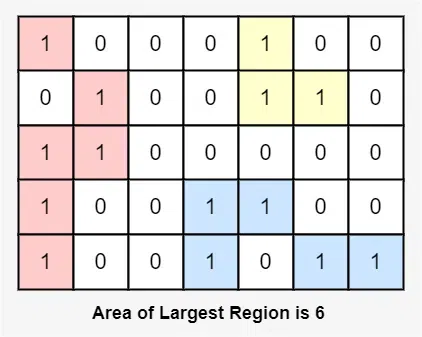

In [17]:
# Python Program to find area of the largest region of 1s


# A function to check if cell(r, c) can be included in DFS
def is_safe(M, r, c, rows, cols):

    # row number is in range, column number is in range and
    # value is 1
    return (r >= 0 and r < rows) and (c >= 0 and c < cols) and (M[r][c] == 1)


# Depth-First-Search to visit all cells in the current island
def dfs(M, r, c, rows, cols, area):

    # Depth-First-Search to visit all cells in the current island
    # These arrays are used to get row and column
    # numbers of 8 neighbours of a given cell
    dirR = [-1, -1, -1, 0, 0, 1, 1, 1]
    dirC = [-1, 0, 1, -1, 1, -1, 0, 1]

    # Increment area of region by 1
    area[0] += 1

    # Mark this cell as visited
    M[r][c] = 0

    # Recur for all connected neighbours
    for i in range(8):
        new_r = r + dirR[i]
        new_c = c + dirC[i]

        if is_safe(M, new_r, new_c, rows, cols):
            dfs(M, new_r, new_c, rows, cols, area)


# function to find area of the largest region of 1s
def largest_region(M):

    # function to find area of the largest region of 1s
    rows = len(M)
    cols = len(M[0])

    # Initialize result as 0 and traverse through the
    # all cells of given matrix
    max_area = 0
    for i in range(rows):
        for j in range(cols):
            # If a cell with value 1 is found
            if M[i][j] == 1:

                # area is taken as a list of size 1 to
                # achieve pass by reference
                area = [0]
                dfs(M, i, j, rows, cols, area)

                # maximize the area
                max_area = max(max_area, area[0])

    return max_area


if __name__ == "__main__":
    M = [
        [1, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 0, 0],
        [1, 0, 0, 1, 0, 1, 1],
    ]

    print(largest_region(M))

6


**shortest path**

Given an Undirected Graph having unit weight, find the shortest path from the source to all other nodes in this graph. In this problem statement, we have assumed the source vertex to be ‘0’. If a vertex is unreachable from the source node, then return -1 for that vertex.

BFS

we have same weight path from going u to any sorrunding v we can use queue

In [10]:
# ```python
from collections import deque, defaultdict


class Solution:
    def shortestPath(self, edges, N, M, src):
        # Create an adjacency list of size N for storing the undirected graph.
        adj = defaultdict(list)
        for u, v in edges:
            adj[u].append(v)
            adj[v].append(u)

        # A dist array of size N initialised with a large number to
        # indicate that initially all the nodes are untraversed.
        dist = [float("inf")] * N
        dist[src] = 0

        # BFS Implementation.
        q = deque([src])
        vis = [False] * N
        vis[src] = True
        while q:
            node = q.popleft()
            for neighbor in adj[node]:
                if not vis[neighbor] and dist[node] + 1 < dist[neighbor]:
                    dist[neighbor] = dist[node] + 1
                    q.append(neighbor)
            vis[node] = True

        # Updated shortest distances are stored in the resultant array ‘ans’.
        # Unreachable nodes are marked as -1.
        ans = [-1] * N
        for i in range(N):
            if dist[i] != float("inf"):
                ans[i] = dist[i]

        return ans


if __name__ == "__main__":
    N = 9
    M = 10
    edges = [
        (0, 1),
        (0, 3),
        (3, 4),
        (4, 5),
        (5, 6),
        (1, 2),
        (2, 6),
        (6, 7),
        (7, 8),
        (6, 8),
    ]

    obj = Solution()
    ans = obj.shortestPath(edges, N, M, 0)

    print(" ".join(map(str, ans)))

0 1 2 1 2 3 3 4 4


find the shortest path from the source to all other nodes in this DAG


Finding the shortest path to a vertex is easy if you already know the shortest paths to all the vertices that can precede it. Processing the vertices in topological order ensures that by the time you get to a vertex, you've already processed all the vertices that can precede it which reduces the computation time significantly. In this approach, we traverse the nodes sequentially according to their reachability from the source.

In [11]:
# Sure, here is the equivalent Python code for the given C++ code:

# ```python
from collections import defaultdict, deque
import sys


class Solution:
    def topoSort(self, node, adj, vis, st):
        vis[node] = 1
        for v, wt in adj[node]:
            if not vis[v]:
                self.topoSort(v, adj, vis, st)
        st.append(node)

    def shortestPath(self, N, M, edges):
        adj = defaultdict(list)
        for u, v, wt in edges:
            adj[u].append((v, wt))

        vis = [0] * N
        st = []

        for i in range(N):
            if not vis[i]:
                self.topoSort(i, adj, vis, st)

        dist = [sys.maxsize] * N
        dist[0] = 0

        while st:
            node = st.pop()
            for v, wt in adj[node]:
                if dist[node] + wt < dist[v]:
                    dist[v] = dist[node] + wt

        for i in range(N):
            if dist[i] == sys.maxsize:
                dist[i] = -1

        return dist


if __name__ == "__main__":
    N = 6
    M = 7
    edges = [
        [0, 1, 2],
        [0, 4, 1],
        [4, 5, 4],
        [4, 2, 2],
        [1, 2, 3],
        [2, 3, 6],
        [5, 3, 1],
    ]

    obj = Solution()
    ans = obj.shortestPath(N, M, edges)

    for val in ans:
        print(val, end=" ")
# ```

# This Python code maintains the original logic and functionality of the provided C++ code. It uses Python's `defaultdict` for the adjacency list and `deque` for the stack operations. The `sys.maxsize` is used to represent infinity for the distance initialization. The main function demonstrates how to use the `Solution` class to find the shortest path in a graph.

0 2 3 6 1 5 

Given an n * m matrix grid where each element can either be 0 or 1. You need to find the shortest distance between a given source cell to a destination cell. The path can only be created out of a cell if its value is 1. 

If the path is not possible between the source cell and the destination cell, then return -1.

BFS

from a cell to another cell in neighbour all have same dist so use queue

In [13]:
from collections import deque


class Solution:
    def shortestPath(self, grid, source, destination):
        # Edge Case: if the source is only the destination.
        if source[0] == destination[0] and source[1] == destination[1]:
            return 0

        # Create a queue for storing cells with their distances from source
        # in the form (dist, (cell coordinates pair)).
        q = deque([(0, (source[0], source[1]))])
        n = len(grid)
        m = len(grid[0])

        # Create a distance matrix with initially all the cells marked as
        # unvisited and the source cell as 0.
        dist = [[float("inf")] * m for _ in range(n)]
        dist[source[0]][source[1]] = 0

        # The following delta rows and delta columns arrays are created such that
        # each index represents each adjacent node that a cell may have
        # in a direction.
        dr = [-1, 0, 1, 0]
        dc = [0, 1, 0, -1]

        # Iterate through the maze by popping the elements out of the queue
        # and pushing whenever a shorter distance to a cell is found.
        while q:
            dis, (r, c) = q.popleft()
            if r == destination[0] and c == destination[1]:
                return dis

            # Through this loop, we check the 4 direction adjacent nodes
            # for a shorter path to destination.
            for i in range(4):
                newr = r + dr[i]
                newc = c + dc[i]

                # Checking the validity of the cell and updating if dist is shorter.
                if (
                    0 <= newr < n
                    and 0 <= newc < m
                    and grid[newr][newc] == 1
                    and dis + 1 < dist[newr][newc]
                ):
                    dist[newr][newc] = 1 + dis

                    q.append((1 + dis, (newr, newc)))

        # If no path is found from source to destination.
        return -1


# Driver Code.
if __name__ == "__main__":
    source = (0, 1)
    destination = (2, 2)

    grid = [[1, 1, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 0, 0], [1, 0, 0, 1]]

    obj = Solution()
    res = obj.shortestPath(grid, source, destination)
    print(res)

3


where heights[row][col] represents the height of the cell (row, col). You are situated in the top-left cell, (0, 0), and you hope to travel to the bottom-right cell, (rows-1, columns-1) (i.e.,0-indexed). You can move up, down, left, or right, and you wish to find a route that requires the minimum effort.

A route's effort is the maximum absolute difference in heights between two consecutive cells of the route.

BFS

from a cell to neighbour value effort will change based on the value hence **heapq**

In [14]:
import heapq


class Solution:
    def MinimumEffort(self, heights):
        # Create a priority queue containing pairs of cells
        # and their respective distance from the source cell in the
        # form {diff, (row of cell, col of cell)}.
        pq = []

        n = len(heights)
        m = len(heights[0])

        # Create a distance matrix with initially all the cells marked as
        # unvisited and the dist for source cell (0,0) as 0.
        dist = [[float("inf")] * m for _ in range(n)]
        dist[0][0] = 0
        heapq.heappush(pq, (0, 0, 0))

        # The following delta rows and delts columns array are created such that
        # each index represents each adjacent node that a cell may have
        # in a direction.
        dr = [-1, 0, 1, 0]
        dc = [0, 1, 0, -1]

        # Iterate through the matrix by popping the elements out of the queue
        # and pushing whenever a shorter distance to a cell is found.
        while pq:
            diff, row, col = heapq.heappop(pq)

            # Check if we have reached the destination cell,
            # return the current value of difference (which will be min).
            if row == n - 1 and col == m - 1:
                return diff

            for i in range(4):
                newr = row + dr[i]
                newc = col + dc[i]

                # Checking validity of the cell.
                if 0 <= newr < n and 0 <= newc < m:
                    # Effort can be calculated as the max value of differences
                    # between the heights of the node and its adjacent nodes.
                    newEffort = max(abs(heights[row][col] - heights[newr][newc]), diff)

                    # If the calculated effort is less than the prev value
                    # we update as we need the min effort.
                    if newEffort < dist[newr][newc]:
                        dist[newr][newc] = newEffort
                        heapq.heappush(pq, (newEffort, newr, newc))

        return 0  # if unreachable


# Driver Code.
heights = [[1, 2, 2], [3, 8, 2], [5, 3, 5]]

obj = Solution()
ans = obj.MinimumEffort(heights)

print(ans)

2


You are given an array of flights where flights[i] = [ fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost price. You have also given three integers src, dst, and k, and return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

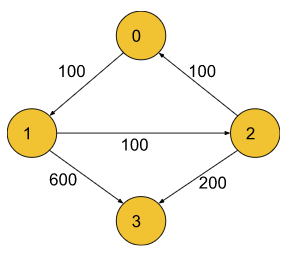

In [ ]:
# BFS with Pruning - Accepted
from collections import deque


class Solution:
    def findCheapestPrice(
        self, n: int, flights: List[List[int]], src: int, dst: int, k: int
    ) -> int:
        # the first BFS gave MLE since we were continuously adding nodes to the queue
        # irrespective of if we've seen a lower price at that said node previously

        # we'd continue to add vertexes to the queue, at nodes we'd already visited and found a shorter path to,
        # provided they're still less than price, and less than k

        # if we've already found a lower price at a particular node, even if it's
        # still a valid vertex to search, there's no need to add it to the queue,
        # we've already discovered a shorter path there
        adjacencyList = {}

        for node, next, weight in flights:
            adjacencyList[node] = adjacencyList.setdefault(node, []) + [(next, weight)]

        q = deque([(src, 0, 0)])
        price = float("inf")

        # to implement a memo we can have a nodeMap containing the smallest value we've ever found
        # at said node
        nodeMap = [float("inf") for _ in range(n)]
        while q:
            node, steps, cost = q.popleft()
            if node == dst:
                price = min(price, cost)
                continue

            # if we ever encounter a node we've seen before, we if the cost we've seen there previously
            # is greater than what it is now
            elif cost > price or cost > nodeMap[node]:
                # if it's greater then skip it, and all its children
                continue

            # otherwise update the smallest value we've seen as said node, and continue processing
            nodeMap[node] = cost

            if steps <= k and cost <= price and node in adjacencyList:
                for next, weight in adjacencyList[node]:
                    q.append((next, steps + 1, weight + cost))

        return price if price != float("inf") else -1

In [6]:
# DFS + Memo - Accepted
from typing import List


class Solution:
    def findCheapestPrice(
        self, n: int, flights: List[List[int]], src: int, dst: int, k: int
    ) -> int:
        adjacencyList = {}

        for node, next, cost in flights:
            adjacencyList[node] = adjacencyList.setdefault(node, []) + [(next, cost)]

        # similar to DFS - TLE, just remember the (node,steps) we were at
        # with memoisation, this now passes
        map = {}

        def dfs(node, steps):
            if node == dst:
                return 0
            elif (node, steps) in map:
                return map[(node, steps)]
            elif steps < 0:
                return float("inf")

            minimum = float("inf")
            if node in adjacencyList:
                for nextNode, weight in adjacencyList[node]:
                    minimum = min(minimum, weight + dfs(nextNode, steps - 1))
            map[(node, steps)] = minimum
            return map[(node, steps)]

        res = dfs(src, k)
        return res if res != float("inf") else -1

In [ ]:
from collections import deque, defaultdict
import heapq


class Solution:
    def CheapestFLight(self, n, flights, src, dst, K):
        # Create the adjacency list to depict airports and flights in
        # the form of a graph.
        adj = defaultdict(list)
        for u, v, w in flights:
            adj[u].append((v, w))

        # Create a queue which stores the node and their distances from the
        # source in the form of {stops, {node, dist}} with ‘stops’ indicating
        # the no. of nodes between src and current node.
        q = deque([(0, src, 0)])

        # Distance array to store the updated distances from the source.
        dist = [float("inf")] * n
        dist[src] = 0

        # Iterate through the graph using a queue like in Dijkstra with
        # popping out the element with min stops first.
        while q:
            stops, node, cost = q.popleft()

            # We stop the process as soon as the limit for the stops reaches.
            if stops > K:
                continue
            for adjNode, edW in adj[node]:
                # We only update the queue if the new calculated dist is
                # less than the prev and the stops are also within limits.
                if cost + edW < dist[adjNode] and stops <= K:
                    dist[adjNode] = cost + edW
                    q.append((stops + 1, adjNode, cost + edW))

        # If the destination node is unreachable return ‘-1’
        # else return the calculated dist from src to dst.
        return dist[dst] if dist[dst] != float("inf") else -1


# Driver Code.
if __name__ == "__main__":
    n = 4
    src = 0
    dst = 3
    K = 1

    flights = [[0, 1, 100], [1, 2, 100], [2, 0, 100], [1, 3, 600], [2, 3, 200]]

    obj = Solution()
    ans = obj.CheapestFLight(n, flights, src, dst, K)

    print(ans)

In [8]:
# Modified Bellman-Ford
class Solution:
    def findCheapestPrice(self, n, flights, src, dst, k):
        # we can solve this problem with a modification on Bellman-Ford

        # the key observation here is in standard Bellman-Ford, the edges
        # are relaxed one after the other. Meaning, if we relaxed an edge
        # previously, ON THE SAME ITERATION, we'd use that value to assess
        # what the current nodes cost should be

        # this approach however mimics us traversing multiple edges on the same iteration
        # when it comes to this problem, it's an issue since we're constrained by k

        # we can still use Bellman-Ford, but the modification involves NOT updating
        # a nodes cost based on a previous vertex until we've finished an iteration

        # so initialise the infinity array
        # as standard in BF the source begins at 0, and the rest of the vertices
        # at infinity
        nodeCosts = [float("inf")] * n
        nodeCosts[src] = 0

        # we'll perform k+1 iterations, since we need to update edges
        # between all nodes k times
        timesToRelax = k + 1

        # run BF timesToRelax times
        for _ in range(timesToRelax):
            # to ensure we don't counts costs based on previously relaxed edges
            # on the same iteration, we copy the current nodes we're observing
            curr = nodeCosts.copy()

            # go through the nodes
            for startNode, nextNode, weight in flights:
                # if it's possible to relax the vertex
                if nodeCosts[startNode] + weight < curr[nextNode]:
                    # we set curr[nextNode] with the relaxed value
                    # we do this in the curr array since we don't want to modify
                    # the current nodeCosts with the new relaxed values
                    # in doing this, previously relaxed nodes on the SAME iteration
                    # don't impact our result. This mimic's us navigating through the graph
                    # 1 edge at a time, as opposed to the original BF which considers multiple moves
                    # on iterations
                    curr[nextNode] = nodeCosts[startNode] + weight
            # curr becomes the new nodeCosts for the next iteration
            nodeCosts = curr
        return nodeCosts[dst] if nodeCosts[dst] != float("inf") else -1

In [7]:
# Modified Dijkstra's Algorithm
from heapq import *


class Solution:
    def findCheapestPrice(self, n, flights, src, dst, k):
        # similar to Belman Ford's shortest path, we can use a modification
        # on Dijkstra's to find a solution for this problem

        # form an adjacency list as normal
        adjacencyList = {}
        for node, nextNode, cost in flights:
            adjacencyList.setdefault(node, [])
            adjacencyList[node].append((nextNode, cost))

        # similar to BF, Dijkstra's sets all unseen nodes to infinity
        nodeMap, pq = [float("inf")] * n, []
        # our source node starts with a value of 0
        heappush(pq, (0, src, 0))

        while pq:
            # on each iteration pop from the queue
            steps, node, cost = heappop(pq)
            # we're only going to add more nodes to the queue if they've
            # taken less than k+1 steps, and their children are present
            # in the adjacency list
            if steps <= k and node in adjacencyList:
                # go through the current nodes neighbours
                for nextNode, weight in adjacencyList[node]:
                    # the path to this node is less than the smallest we've
                    # every seen at nextNode
                    # then relax the edge
                    if weight + cost < nodeMap[nextNode]:
                        # and set the nextNode to the new value
                        nodeMap[nextNode] = weight + cost
                        # add the nextNode to the heap for further processing
                        heappush(pq, (steps + 1, nextNode, weight + cost))
        return nodeMap[dst] if nodeMap[dst] != float("inf") else -1

You are given an integer n and a 2D integer array ‘roads’ where roads[i] = [ui, vi, timei] means that there is a road between intersections ui and vi that takes timei minutes to travel. You want to know in how many ways you can travel from intersection 0 to intersection n - 1 in the shortest amount of time.

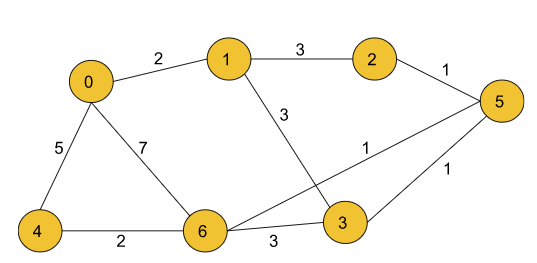


Input:
n=7, m=10
edges= [[0,6,7],[0,1,2],[1,2,3],[1,3,3],[6,3,3],[3,5,1],[6,5,1],[2,5,1],[0,4,5],[4,6,2]]
Output:
4
Explanation: 
The four ways to get there in 7 minutes (which is the shortest calculated time) are:
- 0  6
- 0  4  6
- 0  1  2  5  6
- 0  1  3  5  6

In [9]:
from collections import defaultdict
from heapq import heappush, heappop


class Solution:
    def countPaths(self, n: int, roads: List[List[int]]) -> int:
        # Creating an adjacency list for the given graph.
        adj = defaultdict(list)
        for u, v, w in roads:
            adj[u].append((v, w))
            adj[v].append((u, w))

        # Defining a priority queue (min heap).
        pq = [(0, 0)]  # (distance, node)

        # Initializing the dist array and the ways array
        # along with their first indices.
        dist = [float("inf")] * n
        ways = [0] * n
        dist[0] = 0
        ways[0] = 1
        mod = 10**9 + 7
        done = [False] * n
        done[0] = True
        # Iterate through the graph with the help of priority queue
        # just as we do in Dijkstra's Algorithm.
        while pq:
            d, u = heappop(pq)
            if d > dist[u]:
                continue
            for v, w in adj[u]:
                if not done[v] and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                    ways[v] = ways[u]
                    heappush(pq, (dist[v], v))
                elif dist[u] + w == dist[v]:
                    ways[v] = (ways[v] + ways[u]) % mod
            done[u] = True

        # Finally, we return the no. of ways to reach
        # (n-1)th node modulo 10^9+7.
        return ways[n - 1] % mod

Given start, end, and an array arr of n numbers. At each step, the start is multiplied by any number in the array and then a mod operation with 100000 is done to get the new start.
Your task is to find the minimum steps in which the end can be achieved starting from the start. If it is not possible to reach the end, then return -1.

In [10]:
from collections import deque


class Solution:
    def minimumMultiplications(self, arr, start, end):
        # Create a queue for storing the numbers as a result of multiplication
        # of the numbers in the array and the start number.
        q = deque([(start, 0)])

        # Create a dist array to store the no. of multiplications to reach
        # a particular number from the start number.
        dist = [float("inf")] * 100000
        dist[start] = 0
        mod = 100000

        # Multiply the start no. with each of numbers in the arr
        # until we get the end no.
        while q:
            node, steps = q.popleft()

            for it in arr:
                num = (it * node) % mod

                # If the no. of multiplications are less than before
                # in order to reach a number, we update the dist array.
                if steps + 1 < dist[num]:
                    dist[num] = steps + 1

                    # Whenever we reach the end number
                    # return the calculated steps
                    if num == end:
                        return steps + 1
                    q.append((num, steps + 1))

        # If the end no. is unattainable.
        return -1


# Driver Code.
if __name__ == "__main__":
    start = 3
    end = 30
    arr = [2, 5, 7]

    obj = Solution()
    ans = obj.minimumMultiplications(arr, start, end)

    print(ans)

2


Find the City With the Smallest Number of Neighbours at a Threshold Distance:

There are n cities numbered from 0 to n-1. Given the array edges where edges[i] = [fromi, toi,weighti]  represents a bidirectional and weighted edge between cities fromi and toi, 


Input: n = 4, edges = [[0,1,3],[1,2,1],[1,3,4],[2,3,1]], distanceThreshold = 4
Output: 3


Explanation: The figure above describes the graph. 
The neighboring cities at a distanceThreshold = 4 for each city are:

City 0 -> [City 1, City 2] 

City 1 -> [City 0, City 2, City 3] 

City 2 -> [City 0, City 1, City 3] 

City 3 -> [City 1, City 2] 
Cities 0 and 3 have 2 neighboring cities at a distanceThreshold = 4, but we have to return city 3 since it has the greatest number

In [13]:
class Solution:
    def findTheCity(
        self, n: int, edges: list[list[int]], distanceThreshold: int
    ) -> int:
        # first convert graph to adjacency list representation
        graph: list[list[int]] = [
            [] for _ in range(n)
        ]  # i-th nodes will have graph[i] neighbors
        for node1, node2, distance in edges:
            graph[node1].append([node2, distance])
            graph[node2].append([node1, distance])

        def get_number_of_neighbors_in_distance(source: int) -> int:
            queue: list[tuple[int, int]] = [
                (0, source)
            ]  # distance to node itself is 0, first store distance so heap is "sorted" b distance
            visited = set()

            while queue:
                distance_to_this_node, cur_node = heappop(queue)
                if not cur_node in visited:
                    visited.add(cur_node)
                    for neighbor, distance in graph[cur_node]:
                        distance_from_source = distance_to_this_node + distance
                        if (
                            distance_from_source <= distanceThreshold
                        ):  # ensure that we're allowed to go to this node
                            heappush(queue, (distance_from_source, neighbor))

            # actually you can return len(visited) and with math there will be nothing wrong but actually we have len(visited) - 1 neighbors since we're not neighbor of ourselves
            return len(visited) - 1

        minimum_number: int = n
        res: int = None

        for source in range(n):
            neighbors: int = get_number_of_neighbors_in_distance(source)
            # we iterate source from smaller to bigger this ensures that we choose node with greater value if they have equal number of neighbors
            if neighbors <= minimum_number:
                minimum_number = neighbors
                res = source

        return res

In [14]:
class Solution:
    def findTheCity(
        self, n: int, edges: list[list[int]], distanceThreshold: int
    ) -> int:
        distance: list[list[int]] = [[float("inf") for _ in range(n)] for _ in range(n)]
        for node in range(n):
            distance[node][node] = 0  # distance to itself is 0

        # The distance between nodes which are connected temporary distance between them
        for node1, node2, dist in edges:
            distance[node1][node2] = dist
            distance[node2][node1] = dist

        for midle in range(n):
            for source in range(n):
                for destination in range(n):
                    distance[source][destination] = min(
                        distance[source][destination],
                        distance[source][midle] + distance[midle][destination],
                    )  # the minimum distance is either current value or new value with path that goes through midle

        minimum_number: int = n
        res: int = None

        for source in range(n):
            source_count = 0
            for destination in range(n):
                if distance[source][destination] <= distanceThreshold:
                    source_count += 1

            if (
                source_count <= minimum_number
            ):  # as in dijkstra when number equal we choose greater node
                minimum_number = source_count
                res = source

        return res

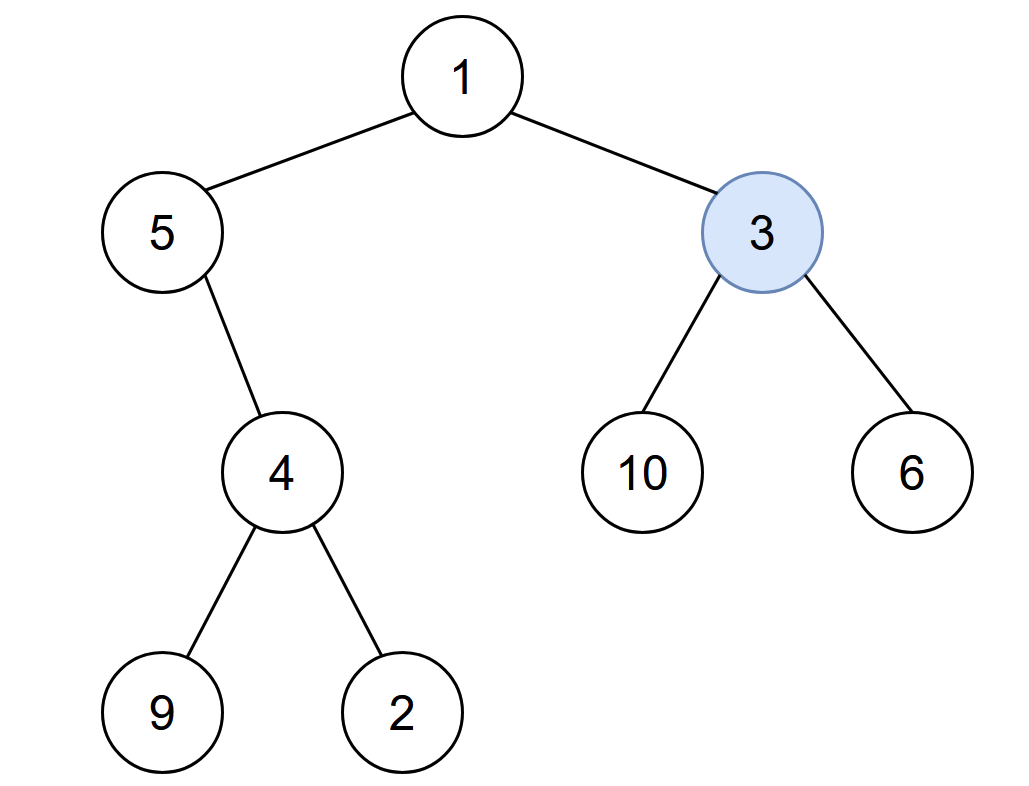

root = [1,5,3,null,4,10,6,9,2], start = 3
Output: 4

In [15]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque


class Solution:
    def amountOfTime(self, root, start: int) -> int:
        graph = defaultdict(list)
        stack = deque([(root, None)])
        while stack:
            n, p = stack.popleft()
            if p:
                graph[p.val].append(n.val)
                graph[n.val].append(p.val)
            if n.left:
                stack.append((n.left, n))
            if n.right:
                stack.append((n.right, n))
        ans = -1
        seen = {start}
        queue = deque([start])
        while queue:
            for _ in range(len(queue)):
                u = queue.popleft()
                for v in graph[u]:
                    if v not in seen:
                        seen.add(v)
                        queue.append(v)
            ans += 1
        return ans

where 0 represents an empty space while 1 represents a wall you cannot walk through. You are also given an integer K. You can walk up, down, left, or right. Given that you can remove up to K walls, return the minimum number of steps to walk from the top left corner (0, 0) to the bottom right corner (N-1, M-1). 

In [18]:
# Python3 code to implement the approach


# Function to find the minimum number of steps
def shortestPath(mat, k):

    n = len(mat)
    m = len(mat[0])
    if n == 1 and m == 1 and (mat[0][0] == 0 or k >= 1):
        return 0

    visited = [[[False for _ in range(k + 1)] for _ in range(m)] for _ in range(n)]
    steps = 0

    q = []
    q.append([0, 0, k])

    ar1 = [1, -1, 0, 0]
    ar2 = [0, 0, -1, 1]

    # Loop to run a BFS
    while len(q) != 0:
        size = len(q)

        steps += 1
        while size:
            curr = q.pop(0)
            i = curr[0]
            j = curr[1]
            w = curr[2]

            visited[i][j][w] = True
            for dir in range(0, 4):
                new_x = i + ar1[dir]
                new_y = j + ar2[dir]
                new_k = w
                if new_x >= 0 and new_x < n and new_y >= 0 and new_y < m:
                    if mat[new_x][new_y] == 0 and (not visited[new_x][new_y][new_k]):
                        if new_x == n - 1 and new_y == m - 1:
                            return steps
                        q.append([new_x, new_y, new_k])
                        visited[new_x][new_y][new_k] = True

                    elif (
                        mat[new_x][new_y] == 1
                        and new_k >= 1
                        and (not visited[new_x][new_y][new_k - 1])
                    ):
                        if new_x == n - 1 and new_y == m - 1:
                            return steps
                        q.append([new_x, new_y, new_k - 1])
                        visited[new_x][new_y][new_k - 1] = True
            size -= 1
    return -1


# Driver code
if __name__ == "__main__":

    mat = [[0, 0, 0], [0, 0, 1], [0, 1, 0]]
    K = 1

    # Function call
    print(shortestPath(mat, K))

4


Maximum Bipartite Matching

“There are M job applicants and N jobs. Each applicant has a subset of jobs that he/she is interested in. Each job opening can only accept one applicant and a job applicant can be appointed for only one job. Find an assignment of jobs to applicants in such that as many applicants as possible get jobs.”

In [16]:
# Python program to find
# maximal Bipartite matching.


class GFG:
    def __init__(self, graph):

        # residual graph
        self.graph = graph
        self.ppl = len(graph)
        self.jobs = len(graph[0])

    # A DFS based recursive function
    # that returns true if a matching
    # for vertex u is possible
    def bpm(self, u, matchR, seen):

        # Try every job one by one
        for v in range(self.jobs):

            # If applicant u is interested
            # in job v and v is not seen
            if self.graph[u][v] and seen[v] == False:

                # Mark v as visited
                seen[v] = True

                """If job 'v' is not assigned to
				an applicant OR previously assigned 
				applicant for job v (which is matchR[v]) 
				has an alternate job available. 
				Since v is marked as visited in the 
				above line, matchR[v] in the following
				recursive call will not get job 'v' again"""
                if matchR[v] == -1 or self.bpm(matchR[v], matchR, seen):
                    matchR[v] = u
                    return True
        return False

    # Returns maximum number of matching
    def maxBPM(self):
        """An array to keep track of the
        applicants assigned to jobs.
        The value of matchR[i] is the
        applicant number assigned to job i,
        the value -1 indicates nobody is assigned."""
        matchR = [-1] * self.jobs

        # Count of jobs assigned to applicants
        result = 0
        for i in range(self.ppl):

            # Mark all jobs as not seen for next applicant.
            seen = [False] * self.jobs

            # Find if the applicant 'u' can get a job
            if self.bpm(i, matchR, seen):
                result += 1
        return result


bpGraph = [
    [0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
]

g = GFG(bpGraph)

print("Maximum number of applicants that can get job is %d " % g.maxBPM())

Maximum number of applicants that can get job is 5 


Given a graph which represents a flow network where every edge has a capacity. Also, given two vertices source ‘s’ and sink ‘t’ in the graph, find the maximum possible flow from s to t with the following constraints:

Flow on an edge doesn’t exceed the given capacity of the edge.
Incoming flow is equal to outgoing flow for every vertex except s and t.

In [ ]:
# Python program for implementation
# of Ford Fulkerson algorithm
from collections import defaultdict


# This class represents a directed graph
# using adjacency matrix representation
class Graph:

    def __init__(self, graph):
        self.graph = graph  # residual graph
        self.ROW = len(graph)
        # self.COL = len(gr[0])

    """Returns true if there is a path from source 's' to sink 't' in
	residual graph. Also fills parent[] to store the path """

    def BFS(self, s, t, parent):

        # Mark all the vertices as not visited
        visited = [False] * (self.ROW)

        # Create a queue for BFS
        queue = []

        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True

        # Standard BFS Loop
        while queue:

            # Dequeue a vertex from queue and print it
            u = queue.pop(0)

            # Get all adjacent vertices of the dequeued vertex u
            # If a adjacent has not been visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    # If we find a connection to the sink node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True

        # We didn't reach sink in BFS starting
        # from source, so return false
        return False

    # Returns the maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):

        # This array is filled by BFS and to store path
        parent = [-1] * (self.ROW)

        max_flow = 0  # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent):

            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to overall flow
            max_flow += path_flow

            # update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


# Create a graph given in the above diagram

graph = [
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0],
]

g = Graph(graph)

source = 0
sink = 5

print("The maximum possible flow is %d " % g.FordFulkerson(source, sink))

In [ ]:
def minSwaps(arr):

    # Temporary array to store elements in sorted order
    temp = sorted(arr)

    # Hashing elements with their correct positions
    pos = {}
    for i in range(len(arr)):
        pos[arr[i]] = i

    swaps = 0
    for i in range(len(arr)):
        if temp[i] != arr[i]:

            # Index of the element that should be at index i.
            ind = pos[temp[i]]
            arr[i], arr[ind] = arr[ind], arr[i]

            # Update the indices in the dictionary
            pos[arr[i]] = i
            pos[arr[ind]] = ind

            swaps += 1
    return swaps

In [1]:
# Python3 program to find maximum
# cash flow among a set of persons

# Number of persons(or vertices in graph)
N = 3


# A utility function that returns
# index of minimum value in arr[]
def getMin(arr):

    minInd = 0
    for i in range(1, N):
        if arr[i] < arr[minInd]:
            minInd = i
    return minInd


# A utility function that returns
# index of maximum value in arr[]
def getMax(arr):

    maxInd = 0
    for i in range(1, N):
        if arr[i] > arr[maxInd]:
            maxInd = i
    return maxInd


# A utility function to
# return minimum of 2 values
def minOf2(x, y):

    return x if x < y else y


# amount[p] indicates the net amount to
# be credited/debited to/from person 'p'
# If amount[p] is positive, then i'th
# person will amount[i]
# If amount[p] is negative, then i'th
# person will give -amount[i]
def minCashFlowRec(amount):

    # Find the indexes of minimum
    # and maximum values in amount[]
    # amount[mxCredit] indicates the maximum
    # amount to be given(or credited) to any person.
    # And amount[mxDebit] indicates the maximum amount
    # to be taken (or debited) from any person.
    # So if there is a positive value in amount[],
    # then there must be a negative value
    mxCredit = getMax(amount)
    mxDebit = getMin(amount)

    # If both amounts are 0,
    # then all amounts are settled
    if amount[mxCredit] == 0 and amount[mxDebit] == 0:
        return 0

    # Find the minimum of two amounts
    min = minOf2(-amount[mxDebit], amount[mxCredit])
    amount[mxCredit] -= min
    amount[mxDebit] += min

    # If minimum is the maximum amount to be
    print("Person ", mxDebit, " pays ", min, " to ", "Person ", mxCredit)

    # Recur for the amount array. Note that
    # it is guaranteed that the recursion
    # would terminate as either amount[mxCredit]
    # or amount[mxDebit] becomes 0
    minCashFlowRec(amount)


# Given a set of persons as graph[] where
# graph[i][j] indicates the amount that
# person i needs to pay person j, this
# function finds and prints the minimum
# cash flow to settle all debts.
def minCashFlow(graph):

    # Create an array amount[],
    # initialize all value in it as 0.
    amount = [0 for i in range(N)]

    # Calculate the net amount to be paid
    # to person 'p', and stores it in amount[p].
    # The value of amount[p] can be calculated by
    # subtracting debts of 'p' from credits of 'p'
    for p in range(N):
        for i in range(N):
            amount[p] += graph[i][p] - graph[p][i]

    minCashFlowRec(amount)


# Driver code

# graph[i][j] indicates the amount
# that person i needs to pay person j
graph = [[0, 1000, 2000], [0, 0, 5000], [0, 0, 0]]

minCashFlow(graph)

Person  1  pays  4000  to  Person  2
Person  0  pays  3000  to  Person  2


In [2]:
import heapq


# Comparator that will be used to make priority_queue
# containing pair of integers maxHeap Comparison is based
# on second entry in the pair which represents cash
# credit/debit
class AscCmp:
    def __call__(self, p1, p2):
        return p1[1] < p2[1]


# Comparator that will be used to make priority_queue
# containing pair of integers minHeap Comparison is based
# on second entry in the pair which represents cash
# credit/debit
class DscCmp:
    def __call__(self, p1, p2):
        return p1[1] > p2[1]


class Solution:
    def __init__(self):
        self.minQ = []
        self.maxQ = []

    # This function will fill in minQ and maxQ in such a
    # way that maxQ will have only positive value. minQ
    # will have only negative value amount is taken as
    # input. amount[i] => cash credit/debit to/from person
    # i amount[i] == 0 will be ignored as no credit/debit
    # is left.
    def constructMinMaxQ(self, amount):
        for i in range(len(amount)):
            if amount[i] == 0:
                continue
            if amount[i] > 0:
                heapq.heappush(self.maxQ, (i, amount[i]))
            else:
                heapq.heappush(self.minQ, (i, amount[i]))

    # This function will iterate over minQ and maxQ until
    # empty. It will fetch max credit and min debit. If sum
    # of both is not equal to zero, then push remaining
    # credit or debit back to the required queue. At the
    # end of the loop, print result
    def solveTransaction(self):
        while self.minQ and self.maxQ:
            maxCreditEntry = heapq.heappop(self.maxQ)
            maxDebitEntry = heapq.heappop(self.minQ)

            transaction_val = maxCreditEntry[1] + maxDebitEntry[1]

            debtor = maxDebitEntry[0]
            creditor = maxCreditEntry[0]
            owed_amount = 0

            if transaction_val == 0:
                owed_amount = maxCreditEntry[1]
            elif transaction_val < 0:
                owed_amount = maxCreditEntry[1]
                heapq.heappush(self.minQ, (maxDebitEntry[0], transaction_val))
            else:
                owed_amount = -maxDebitEntry[1]
                heapq.heappush(self.maxQ, (maxCreditEntry[0], transaction_val))

            print(f"Person {debtor} pays {owed_amount} to Person {creditor}")

    def minCashFlow(self, graph):
        n = len(graph)

        # Calculate the cash to be credited/debited to/from
        # each person and store in vector amount
        amount = [0] * n
        for i in range(n):
            for j in range(n):
                diff = graph[j][i] - graph[i][j]
                amount[i] += diff

        # Fill in both queues minQ and maxQ using amount
        # vector
        self.constructMinMaxQ(amount)

        # Solve the transaction using minQ, maxQ and amount
        # vector
        self.solveTransaction()


# Test cases
graph1 = [
    [0, 1000, 2000],
    [0, 0, 5000],
    [0, 0, 0],
]

graph2 = [
    [2, 63, 0, 85, 49],
    [0, 76, 0, 0, 27],
    [0, 0, 0, 17, 0],
    [73, 32, 50, 6, 71],
    [0, 86, 0, 0, 10],
]

print("Solution 1:")
S = Solution()
S.minCashFlow(graph1)
print("\nSolution 2:")
S2 = Solution()
S2.minCashFlow(graph2)

Solution 1:
Person 0 pays 3000 to Person 2
Person 1 pays 4000 to Person 2

Solution 2:
Person 0 pays 124 to Person 1
Person 3 pays 30 to Person 1
Person 3 pays 33 to Person 2
Person 3 pays 61 to Person 4


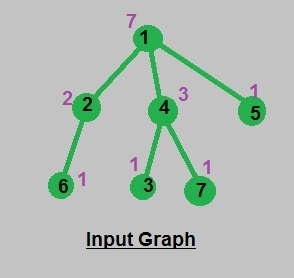

In [3]:
# Python3 code to find the number of
# nodes in the subtree of each node
N = 8

# variables used to store data globally
count1 = [0] * (N)

# Adjacency list representation of tree
adj = [[] for i in range(N)]


# Function to calculate no. of
# nodes in subtree
def numberOfNodes(s, e):

    count1[s] = 1
    for u in adj[s]:

        # Condition to omit reverse path
        # path from children to parent
        if u == e:
            continue

        # recursive call for DFS
        numberOfNodes(u, s)

        # update count[] value of parent
        # using its children
        count1[s] += count1[u]


# Function to add edges in graph
def addEdge(a, b):

    adj[a].append(b)
    adj[b].append(a)


# Function to print result
def printNumberOfNodes():

    for i in range(1, N):
        print("Nodes in subtree of", i, ":", count1[i])


# Driver Code
if __name__ == "__main__":

    # insertion of nodes in graph
    addEdge(1, 2)
    addEdge(1, 4)
    addEdge(1, 5)
    addEdge(2, 6)
    addEdge(4, 3)
    addEdge(4, 7)

    # call to perform dfs calculation
    # making 1 as root of tree
    numberOfNodes(1, 0)

    # print result
    printNumberOfNodes()

Nodes in subtree of 1 : 7
Nodes in subtree of 2 : 2
Nodes in subtree of 3 : 1
Nodes in subtree of 4 : 3
Nodes in subtree of 5 : 1
Nodes in subtree of 6 : 1
Nodes in subtree of 7 : 1


check if possible to reach d from s with atleast cost p

In [27]:
def solve(s, d, adj, p, cost, dp):

    if (s, cost) in dp:
        return dp[(s, cost)]

    if s == d and cost <= p:
        return True
    if cost > p:
        return False

    found = False
    for u, w in adj[s]:

        if solve(u, d, adj, p, cost + w, dp):
            found = True
            # return True
    dp[(s, cost)] = found
    return dp[(s, cost)]


def roadsPossible(v, e, s, d, edges, p):
    adjList = [[] for _ in range(v)]
    # add edges to the undirected graph
    for src, dest, w in edges:
        adjList[src].append((dest, w))
        adjList[dest].append((src, w))

    return solve(s, d, adjList, p, 0, dict())

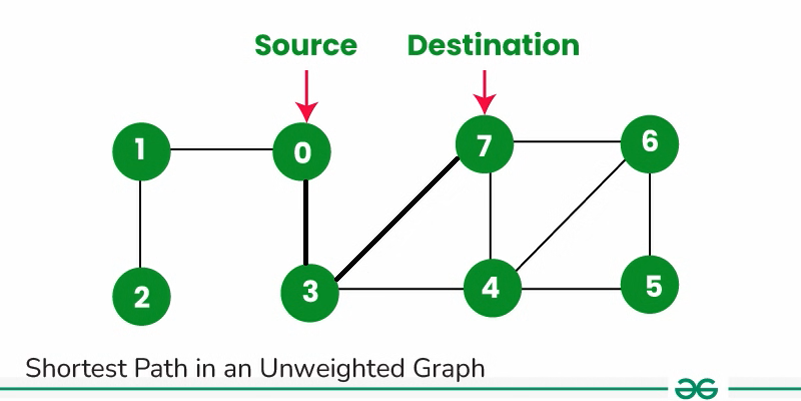

In [1]:
from collections import deque


def bfs(graph, S, par, dist):
    # Queue to store the nodes in the order they are visited
    q = deque()
    # Mark the distance of the source node as 0
    dist[S] = 0
    # Push the source node to the queue
    q.append(S)

    # Iterate until the queue is not empty
    while q:
        # Pop the node at the front of the queue
        node = q.popleft()

        # Explore all the neighbors of the current node
        for neighbor in graph[node]:
            # Check if the neighboring node is not visited
            if dist[neighbor] == float("inf"):
                # Mark the current node as the parent of the neighboring node
                par[neighbor] = node
                # Mark the distance of the neighboring node as the distance of the current node + 1
                dist[neighbor] = dist[node] + 1
                # Insert the neighboring node to the queue
                q.append(neighbor)


def print_shortest_distance(graph, S, D, V):
    # par[] array stores the parent of nodes
    par = [-1] * V

    # dist[] array stores the distance of nodes from S
    dist = [float("inf")] * V

    # Function call to find the distance of all nodes and their parent nodes
    bfs(graph, S, par, dist)

    if dist[D] == float("inf"):
        print("Source and Destination are not connected")
        return

    # List path stores the shortest path
    path = []
    current_node = D
    path.append(D)
    while par[current_node] != -1:
        path.append(par[current_node])
        current_node = par[current_node]

    # Printing path from source to destination
    for i in range(len(path) - 1, -1, -1):
        print(path[i], end=" ")


# Driver program to test above functions
if __name__ == "__main__":
    # no. of vertices
    V = 8
    # Source and Destination vertex
    S, D = 2, 6
    # Edge list
    edges = [
        [0, 1],
        [1, 2],
        [0, 3],
        [3, 4],
        [4, 7],
        [3, 7],
        [6, 7],
        [4, 5],
        [4, 6],
        [5, 6],
    ]

    # List to store the graph as an adjacency list
    graph = [[] for _ in range(V)]

    for edge in edges:
        graph[edge[0]].append(edge[1])
        graph[edge[1]].append(edge[0])

    print_shortest_distance(graph, S, D, V)

2 1 0 3 4 6 

In [6]:
# Python3 program to count number of shortest
# paths from a given source to every other
# vertex using BFS.
from collections import deque
from sys import maxsize as INT_MAX


# Traverses graph in BFS manner. It fills
# dist[] and paths[]
def BFS(adj: list, src: int, dist: list, paths: list, n: int):
    visited = [False] * n
    dist[src] = 0
    paths[src] = 1
    visited[src] = True

    q = deque()
    q.append(src)
    visited[src] = True
    while q:
        curr = q[0]
        q.popleft()

        # For all neighbors of current vertex do:
        for x in adj[curr]:

            # if the current vertex is not yet
            # visited, then push it to the queue.
            # if not visited[x]:

            if not visited[x] and dist[x] > dist[curr] + 1:
                dist[x] = dist[curr] + 1
                paths[x] = paths[curr]
                q.append(x)

                # additional shortest paths found
            elif not visited[x] and dist[x] == dist[curr] + 1:
                paths[x] += paths[curr]

        visited[curr] = True


# function to find number of different
# shortest paths form given vertex s.
# n is number of vertices.
def findShortestPaths(adj: list, s: int, n: int):
    dist = [INT_MAX] * n
    paths = [0] * n
    BFS(adj, s, dist, paths, n)
    print("Numbers of shortest Paths are:", end=" ")
    for i in paths:
        print(i, end=" ")


# A utility function to add an edge in a
# directed graph.
def addEdge(adj: list, u: int, v: int):
    adj[u].append(v)


# Driver Code
if __name__ == "__main__":

    n = 7  # Number of vertices
    adj = [0] * n
    for i in range(n):
        adj[i] = []
    addEdge(adj, 0, 1)
    addEdge(adj, 0, 2)
    addEdge(adj, 1, 2)
    addEdge(adj, 1, 3)
    addEdge(adj, 2, 3)
    addEdge(adj, 3, 4)
    addEdge(adj, 3, 5)
    addEdge(adj, 4, 6)
    addEdge(adj, 5, 6)
    findShortestPaths(adj, 0, 7)

Numbers of shortest Paths are: 1 1 1 2 2 2 4 

We will traverse the graph using DFS traversal but with slight modifications i.e. while traversing we will keep track of the parent node by which the particular node is reached because we will update the low[node] = min(low[all it’s adjacent node except parent]) hence we need to keep track of the parent.

While traversing adjacent nodes let ‘v’ of a particular node let ‘u’, then 3 cases arise –

1. v is parent of u then, 

skip that iteration.
2. v is visited then,

update the low of u i.e. low[u] = min( low[u] , disc[v]) this arises when a node can be visited by more than one node, but low is to keep track of the lowest possible time so we will update it.
3. v is not visited then,

call the DFS to traverse ahead
now update the low[u] = min( low[u], low[v] ) as we know v can’t be parent cause we have handled that case first.
now check if ( low[v] > disc[u] ) i.e. the lowest possible to time to reach ‘v’ is greater than ‘u’ this means we can’t reach ‘v’ without ‘u’ so the edge   u -> v is a bridge.

In [ ]:
# Python program to find bridges in a given undirected graph
# Complexity : O(V+E)

from collections import defaultdict


# This class represents an undirected graph using adjacency list representation
class Graph:

    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = defaultdict(list)  # default dictionary to store graph
        self.Time = 0

    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    """A recursive function that finds and prints bridges
    using DFS traversal
    u --> The vertex to be visited next
    visited[] --> keeps track of visited vertices
    disc[] --> Stores discovery times of visited vertices
    parent[] --> Stores parent vertices in DFS tree"""

    def bridgeUtil(self, u, visited, parent, low, disc):

        # Mark the current node as visited and print it
        visited[u] = True

        # Initialize discovery time and low value
        disc[u] = self.Time
        low[u] = self.Time
        self.Time += 1

        # Recur for all the vertices adjacent to this vertex
        for v in self.graph[u]:
            # If v is not visited yet, then make it a child of u
            # in DFS tree and recur for it
            if visited[v] == False:
                parent[v] = u
                self.bridgeUtil(v, visited, parent, low, disc)

                # Check if the subtree rooted with v has a connection to
                # one of the ancestors of u
                low[u] = min(low[u], low[v])

                """ If the lowest vertex reachable from subtree
                under v is below u in DFS tree, then u-v is
                a bridge"""
                if low[v] > disc[u]:
                    print("%d %d" % (u, v))

            elif v != parent[u]:  # Update low value of u for parent function calls.
                low[u] = min(low[u], disc[v])

    # DFS based function to find all bridges. It uses recursive
    # function bridgeUtil()
    def bridge(self):

        # Mark all the vertices as not visited and Initialize parent and visited,
        # and ap(articulation point) arrays
        visited = [False] * (self.V)
        disc = [float("Inf")] * (self.V)
        low = [float("Inf")] * (self.V)
        parent = [-1] * (self.V)

        # Call the recursive helper function to find bridges
        # in DFS tree rooted with vertex 'i'
        for i in range(self.V):
            if visited[i] == False:
                self.bridgeUtil(i, visited, parent, low, disc)


# Create a graph given in the above diagram
g1 = Graph(5)
g1.addEdge(1, 0)
g1.addEdge(0, 2)
g1.addEdge(2, 1)
g1.addEdge(0, 3)
g1.addEdge(3, 4)


print("Bridges in first graph ")
g1.bridge()

g2 = Graph(4)
g2.addEdge(0, 1)
g2.addEdge(1, 2)
g2.addEdge(2, 3)
print("\nBridges in second graph ")
g2.bridge()


g3 = Graph(7)
g3.addEdge(0, 1)
g3.addEdge(1, 2)
g3.addEdge(2, 0)
g3.addEdge(1, 3)
g3.addEdge(1, 4)
g3.addEdge(1, 6)
g3.addEdge(3, 5)
g3.addEdge(4, 5)
print("\nBridges in third graph ")
g3.bridge()

One lowercase letter is assigned to each vertex. The value of the path is the number of the most frequently occurring letters in the path. The task is to find a path whose value is the largest.

In [16]:
# Python code for the above approach

from collections import deque


def maxPathValue(n, m, edges, values):
    # Adjacency list.
    adj = [[] for _ in range(n + 1)]
    # vector<int> adj[n + 1];

    # To store the indegree of each node.
    inDegree = [0 for _ in range(n + 1)]

    # Iterate through the edges.
    for i in edges:
        adj[i[0]].append(i[1])
        inDegree[i[1]] += 1

    # Queue for traversing the nodes in the
    # topological order.
    q = deque()

    # To store the frequency of each character
    # for each node.
    dp = [[0 for j in range(26)] for i in range(n + 1)]

    # Push all nodes with 0 indegree into the queue.
    for i in range(1, n + 1):
        if inDegree[i] == 0:
            q.append(i)

    # To count the number of nodes popped from the queue.
    popCounts, ans = 0, 0

    while len(q):
        # Pop the front node.
        curr = q.popleft()
        popCounts += 1

        # Increment the value of the character assigned to
        # the current node.
        dp[curr][ord(values[curr - 1]) - ord("a")] += 1
        ans = max(ans, dp[curr][ord(values[curr - 1]) - ord("a")])

        # Iterate through all adjacent nodes.
        for i in adj[curr]:
            # Update the dp array for the adjacent node.
            for j in range(26):
                dp[i][j] = max(dp[i][j], dp[curr][j])

            inDegree[i] -= 1

            # Push the node into the queue if all incoming
            # edges to that node have been traversed.
            if inDegree[i] == 0:
                q.append(i)

        if popCounts == n:
            break

    # Check whether there is a cycle or not.
    if len(q) > 0 or popCounts < n:
        return -1
    return ans


def main():
    # Example inputs
    n, m = 5, 4

    edges = [[1, 2], [1, 3], [3, 4], [4, 5]]
    values = "abaca"

    # Function call
    result = maxPathValue(n, m, edges, values)

    # Display the result
    if result != -1:
        print("Maximum path value:", result)
    else:
        print("-1")


if __name__ == "__main__":
    main()

Maximum path value: 3


nof ilands

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

In [7]:
class UnionFind:
    def __init__(self):
        self.components = 0
        self.parents = {}
        self.ranks = {}

    def add(self, value):
        self.components += 1
        self.parents[value] = value
        self.ranks[value] = 1

    def find(self, value):
        if self.parents[value] == value:
            return value

        parent = self.find(self.parents[value])
        self.parents[value] = parent
        return parent

    def union(self, a, b):
        aparent = self.find(a)
        bparent = self.find(b)

        if aparent == bparent:
            return

        arank = self.ranks[aparent]
        brank = self.ranks[bparent]

        if arank > brank:
            self.parents[bparent] = aparent
        elif arank < brank:
            self.parents[aparent] = bparent
        else:
            self.parents[bparent] = aparent
            self.ranks[aparent] = arank + 1

        self.components -= 1


class Solution:
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    def numIslands(self, grid) -> int:
        uf = self.createUnionFind(grid)

        for row in range(len(grid)):
            for col in range(len(grid[row])):
                if grid[row][col] == "0":
                    continue

                for dx, dy in self.directions:
                    drow = row + dx
                    dcol = col + dy

                    if (
                        drow < 0
                        or drow == len(grid)
                        or dcol < 0
                        or dcol == len(grid[drow])
                    ):
                        continue

                    if grid[drow][dcol] == "0":
                        continue

                    uf.union(
                        self.toFlatIdx(grid, row, col), self.toFlatIdx(grid, drow, dcol)
                    )

        return uf.components

    def createUnionFind(self, grid):
        uf = UnionFind()
        for row in range(len(grid)):
            for col in range(len(grid[row])):
                if grid[row][col] == "1":
                    idx = self.toFlatIdx(grid, row, col)
                    uf.add(idx)
        return uf

    def toFlatIdx(self, grid, row, col):
        return row * len(grid[row]) + col


grid = [
    ["1", "1", "0", "0", "0"],
    ["1", "1", "0", "0", "0"],
    ["0", "0", "1", "0", "0"],
    ["0", "0", "0", "1", "1"],
]
# Output: 3

initially, the grid is filled with 0, which means only water and no land.



At each query, the value of 'grid' at (x, y) becomes 1, which means it becomes land.



Find out, after each query, the number of islands in the grid.

In [ ]:
class DisjointSet:
    def __init__(self, n):
        self.rank = [0] * (n + 1)
        self.parent = list(range(n + 1))
        self.size = [1] * (n + 1)

    def findUPar(self, node):
        if node == self.parent[node]:
            return node
        self.parent[node] = self.findUPar(self.parent[node])
        return self.parent[node]

    def unionByRank(self, u, v):
        ulp_u = self.findUPar(u)
        ulp_v = self.findUPar(v)
        if ulp_u == ulp_v:
            return
        if self.rank[ulp_u] < self.rank[ulp_v]:
            self.parent[ulp_u] = ulp_v
        elif self.rank[ulp_v] < self.rank[ulp_u]:
            self.parent[ulp_v] = ulp_u
        else:
            self.parent[ulp_v] = ulp_u
            self.rank[ulp_u] += 1

    def unionBySize(self, u, v):
        ulp_u = self.findUPar(u)
        ulp_v = self.findUPar(v)
        if ulp_u == ulp_v:
            return
        if self.size[ulp_u] < self.size[ulp_v]:
            self.parent[ulp_u] = ulp_v
            self.size[ulp_v] += self.size[ulp_u]
        else:
            self.parent[ulp_v] = ulp_u
            self.size[ulp_u] += self.size[ulp_v]


class Solution:
    def isValid(self, adjr, adjc, n, m):
        return 0 <= adjr < n and 0 <= adjc < m

    def numOfIslands(self, n, m, operators):
        ds = DisjointSet(n * m)
        vis = [[0] * m for _ in range(n)]
        cnt = 0
        ans = []
        for it in operators:
            row, col = it
            if vis[row][col] == 1:  # already vis  n of ilands will stay same
                ans.append(cnt)
                continue
            vis[row][col] = 1
            cnt += 1
            dr = [-1, 0, 1, 0]
            dc = [0, 1, 0, -1]
            for ind in range(4):
                adjr = row + dr[ind]
                adjc = col + dc[ind]
                if self.isValid(adjr, adjc, n, m):
                    if vis[adjr][adjc] == 1:
                        nodeNo = row * m + col
                        adjNodeNo = adjr * m + adjc
                        if ds.findUPar(nodeNo) != ds.findUPar(adjNodeNo):
                            cnt -= 1
                            ds.unionBySize(nodeNo, adjNodeNo)
            ans.append(cnt)
        return ans


if __name__ == "__main__":
    n = 4
    m = 5
    operators = [
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 0],
        [0, 1],
        [0, 3],
        [1, 3],
        [0, 4],
        [3, 2],
        [2, 2],
        [1, 2],
        [0, 2],
    ]

    obj = Solution()
    ans = obj.numOfIslands(n, m, operators)
    print(" ".join(map(str, ans)))

1 1 2 1 1 2 2 2 3 3 1 1


In [24]:
class Solution:
    def numIslands2(self, m: int, n: int, positions):
        parent = list(range(m * n))  # Initialize parent list for disjoint set
        grid = [[0] * n for _ in range(m)]  # Initialize the grid with all water (0s)

        # Helper function to check if a position is within bounds and is land
        def is_valid_land(i, j):
            return 0 <= i < m and 0 <= j < n and grid[i][j] == 1

        # Find function for disjoint set with path compression
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])  # Path compression
            return parent[x]

        # List to record the number of islands after each addLand operation
        num_islands_after_each_add_land = []
        current_num_islands = 0  # Current number of islands

        for i, j in positions:
            index = (
                i * n + j
            )  # Convert the 2D position to a 1D index for the disjoint set

            # If the land is already added, append the current number of islands and skip
            if grid[i][j] == 1:
                num_islands_after_each_add_land.append(current_num_islands)
                continue

            grid[i][j] = 1  # Mark the position as land
            current_num_islands += 1  # Increment island count by one
            for dx, dy in [
                (-1, 0),
                (1, 0),
                (0, -1),
                (0, 1),
            ]:  # Check surrounding positions
                neighbor_i = i + dx
                neighbor_j = j + dy

                # If neighbor is valid land, merge sets if they are not already part of the same set
                if is_valid_land(neighbor_i, neighbor_j):
                    neighbor_index = neighbor_i * n + neighbor_j
                    root = find(index)
                    neighbor_root = find(neighbor_index)
                    if root != neighbor_root:
                        parent[root] = neighbor_root  # Union operation
                        current_num_islands -= (
                            1  # If two lands are connected, decrement island count
                        )

            # Append the updated number of islands after this addLand operation
            num_islands_after_each_add_land.append(current_num_islands)

        return num_islands_after_each_add_land


n = 4
m = 5
operators = [
    [0, 0],
    [0, 0],
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 3],
    [1, 3],
    [0, 4],
    [3, 2],
    [2, 2],
    [1, 2],
    [0, 2],
]
obj = Solution()
obj.numIslands2(n, m, operators)

[1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 1, 1]

In [26]:
# Python program to find root which gives minimum
# height to tree

# This class represents a undirected graph using
# adjacency list representation


class Graph:

    # Constructor of graph, initialize adjacency list
    # and degree vector
    def __init__(self, V, addEdge, rootForMinimumHeight):
        self.V = V
        self.adj = dict((i, []) for i in range(V))
        self.degree = list()
        for i in range(V):
            self.degree.append(0)

        # The below lines allows us define methods outside
        # of class definition
        # Check http://bit.ly/2e5HfrW for better explanation
        Graph.addEdge = addEdge
        Graph.rootForMinimumHeight = rootForMinimumHeight


# addEdge method adds vertex to adjacency list and
# increases degree by 1
def addEdge(self, v, w):
    self.adj[v].append(w)  # Adds w to v's list
    self.adj[w].append(v)  # Adds v to w's list
    self.degree[v] += 1  # increment degree of v by 1
    self.degree[w] += 1  # increment degree of w by 1


# Method to return roots which gives minimum height to tree
def rootForMinimumHeight(self):

    from queue import Queue

    q = Queue()

    # First enqueue all leaf nodes in queue
    for i in range(self.V):
        if self.degree[i] == 1:
            q.put(i)

    # loop until total vertex remains less than 2
    while self.V > 2:
        p = q.qsize()
        self.V -= p
        for i in range(p):
            t = q.get()

            # for each neighbour, decrease its degree and
            # if it become leaf, insert into queue
            for j in self.adj[t]:
                self.degree[j] -= 1
                if self.degree[j] == 1:
                    q.put(j)

    # Copying the result from queue to result vector
    res = list()
    while q.qsize() > 0:
        res.append(q.get())

    return res


# Driver code
g = Graph(6, addEdge, rootForMinimumHeight)
g.addEdge(0, 3)
g.addEdge(1, 3)
g.addEdge(2, 3)
g.addEdge(4, 3)
g.addEdge(5, 4)

# Function call
res = g.rootForMinimumHeight()
for i in res:
    print(i, end=" ")

3 4 

Your task is to return the cheapest price from the given ‘source’ to ‘destination’ with up to ‘K’ stops. If there is no such route, return ‘-1’.

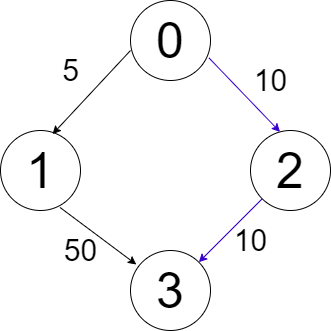

In [31]:
"""
    Time Complexity:  O((N+M)*K*log((N+M)*K))
    Space Complexity: O((N+M)*K),

    where N is the number of stations, M is the number of trains, and K is the number of stops.

"""

from typing import List
import heapq


def savingMoney(
    n: int, source: int, destination: int, k: int, trains: List[List[int]]
) -> int:
    adjList = [[] for _ in range(n)]

    for i in range(len(trains)):
        adjList[trains[i][0]].append((trains[i][1], trains[i][2]))

    #  MinHeap based on the price of ticket

    pq = [(0, source, k + 1)]
    heapq.heapify(pq)

    while pq:
        price, current, stop = heapq.heappop(pq)

        # When we reach our destination station, return the ticket price.

        if current == destination:
            return price

        # If number of stops > 0.
        if stop > 0:
            for i in range(len(adjList[current])):
                next_station, ticket_price = adjList[current][i]
                heapq.heappush(pq, (price + ticket_price, next_station, stop - 1))

    return -1


s, d, k = 0, 3, 2
n = 4
edges = [[0, 1, 5], [0, 2, 10], [1, 3, 50], [2, 3, 10]]
adj = [[] * n for _ in range(n)]
for u, v, w in edges:
    adj[u].append((v, w))


def solve(s, d, adj, k, m, cost, dp):
    if s == d and m <= k:
        return cost
    if m > k:
        return float("inf")
    if (s, m) in dp:
        return dp[(s, m)]
    ans = float("inf")
    for v, w in adj[s]:
        ans = min(ans, solve(v, d, adj, k, m + 1, cost + w, dp))
    dp[(s, m)] = ans
    return dp[(s, m)]


solve(s, d, adj, k, 0, 0, dict())

20

In [60]:
# Python3 program to implement single source
# shortest path for a Binary Graph
from sys import maxsize as INT_MAX
from collections import deque

# no.of vertices
V = 9


# vector to store edges
edges = [[] for _ in range(V)]


# Prints shortest distance from
# given source to every other vertex
def zeroOneBFS(edges, src):

    # Initialize distances from given source
    dist = [0] * V
    for i in range(V):
        dist[i] = float("inf")

    # double ende queue to do BFS.
    Q = deque()
    dist[src] = 0
    Q.append(src)

    while Q:
        u = Q[0]
        Q.popleft()

        for v, w in edges[u]:

            # checking for the optimal distance
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w

                # Put 0 weight edges to front and 1 weight
                # edges to back so that vertices are processed
                # in increasing order of weights.
                if w == 0:
                    Q.appendleft(v)
                else:
                    Q.append(v)

    # printing the shortest distances
    for i in range(V):
        print(dist[i], end=" ")
    print()


def addEdge(u: int, v: int, wt: int):
    edges[u].append((v, wt))
    edges[u].append((v, wt))


# Driver Code
if __name__ == "__main__":

    addEdge(0, 1, 0)
    addEdge(0, 7, 1)
    addEdge(1, 7, 1)
    addEdge(1, 2, 1)
    addEdge(2, 3, 0)
    addEdge(2, 5, 0)
    addEdge(2, 8, 1)
    addEdge(3, 4, 1)
    addEdge(3, 5, 1)
    addEdge(4, 5, 1)
    addEdge(5, 6, 1)
    addEdge(6, 7, 1)
    addEdge(7, 8, 1)

    # source node
    src = 0
    zeroOneBFS(edges, src)

0 0 1 1 2 1 2 1 2 


Minimum edges to reverse to make path from a source to a destination

This problem can be solved assuming a different version of the given graph. In this version we make a reverse edge corresponding to every edge and we assign that a weight 1 and assign a weight 0 to original edge.

In [63]:
adj = [[] for _ in range(7)]
adj[0].append(1)
adj[2].append(1)
adj[5].append(1)
adj[2].append(3)
adj[6].append(3)
adj[6].append(4)
adj[4].append(5)

new_adj = [[] for _ in range(7)]
for u in range(7):
    for v in adj[u]:
        new_adj[u].append((v, 0))
        new_adj[v].append((u, 1))
new_adj

[[(1, 0)],
 [(0, 1), (2, 1), (5, 1)],
 [(1, 0), (3, 0)],
 [(2, 1), (6, 1)],
 [(5, 0), (6, 1)],
 [(4, 1), (1, 0)],
 [(3, 0), (4, 0)]]

In [64]:
zeroOneBFS(new_adj, 0)

0 0 1 1 2 1 2 inf inf 


Each edge of the graph is either ‘red’ or ‘blue’ colored. The graph may contain self-edges or parallel edges. You are given two arrays, ‘redEdges’ and ‘blueEdges’, whose each element is of the form [i, j], denoting an edge from node ‘i’ to node ‘j’ of the respective color. Your task is to compute an array ‘answer’ of size ‘N’, where ‘answer[i]’ stores the shortest path length from node ‘0’ to node ‘i’ such that the edges along the path have alternate colors.

In [ ]:
def shortestAlternatingPaths(n: int, redEdges, blueEdges):
    graph = defaultdict(list)
    for a, b in redEdges:
        graph[a].append((b, "r"))
    for u, v in blueEdges:
        graph[u].append((v, "b"))
    ans = [-1] * n
    queue = deque([(0, 0, None)])

    visited = set()
    visited.add((0, 0, None))
    while queue:
        node, dist, prevEdge = queue.popleft()
        if ans[node] == -1:
            ans[node] = dist
        for neighbour, edge in graph[node]:
            if (neighbour, edge) not in visited and prevEdge != edge:
                visited.add((neighbour, edge))
                queue.append((neighbour, dist + 1, edge))
    return ans

In [72]:
# Python program to count triangles
# in a graph. The program is
# for adjacency matrix
# representation of the graph.


# function to calculate the number
# of triangles in a simple
# directed/undirected graph.
# isDirected is true if the graph
# is directed, its false otherwise
def countTriangle(g, isDirected):
    nodes = len(g)
    count_Triangle = 0

    # Consider every possible
    # triplet of edges in graph
    for i in range(nodes):
        for j in range(nodes):
            for k in range(nodes):

                # check the triplet
                # if it satisfies the condition
                if i != j and i != k and j != k and g[i][j] and g[j][k] and g[k][i]:
                    count_Triangle += 1

    # If graph is directed , division is done by 3
    # else division by 6 is done
    if isDirected:
        return count_Triangle // 3
    else:
        return count_Triangle // 6


# Create adjacency matrix of an undirected graph
graph = [[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0]]
# Create adjacency matrix of a directed graph
digraph = [[0, 0, 1, 0], [1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0]]

print("The Number of triangles in undirected graph : %d" % countTriangle(graph, False))

print("The Number of triangles in directed graph : %d" % countTriangle(digraph, True))

# This code is contributed by Neelam Yadav

The Number of triangles in undirected graph : 2
The Number of triangles in directed graph : 2


In [73]:
# Find the smallest set of vertices from which all the nodes in the graph are reachable.


#
def getSmallestSetOfVertices(n, edges):
    ind = [0] * n
    for u, v in edges:
        ind[v] += 1
    ans = []
    for i in range(n):
        if ind[i] == 0:
            ans.append(i)
    return ans

Return an edge that can be removed so that the resulting graph is a tree of n nodes. If there are multiple answers, return the answer that occurs last in the input.


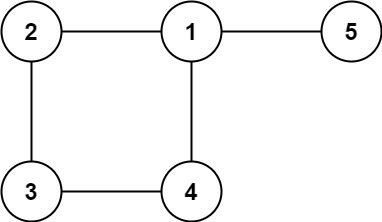

[1,4] 

In [ ]:
class Solution:
    def findRedundantConnection(self, edges):
        n = len(edges)

        parent = list(range(n + 1))
        rank = [1] * (n + 1)

        def find(p):
            while parent[p] != p:
                parent[p] = parent[parent[p]]
                p = parent[p]

            return p

        def union(n1, n2):
            p1, p2 = find(n1), find(n2)

            if rank[p1] < rank[p2]:
                parent[p1] = p2
                rank[p2] += rank[p1]
            else:
                parent[p2] = p1
                rank[p1] += rank[p2]

        for u, v in edges:
            p1, p2 = find(u), find(v)
            if p1 == p2:
                return [u, v]
            else:
                union(u, v)

        return []


def redundantConnection(arr):
    sol = Solution()
    return sol.findRedundantConnection(arr)

An undirected graph is a tree if it has the following properties. 

There is no cycle. 
The graph is connected.

method-2

However if we observe carefully the definition of tree and its structure we will deduce that if a graph is connected and has n – 1 edges exactly then the graph is a tree.

Proof: 

Since we have assumed our graph of n nodes to be connected, it must have at least n – 1 edges inside it. Now if we try to add one more edge than the n – 1 edges already the graph will end up forming a cycle and thus will not satisfy the definition of tree. Therefore, it is necessary for a connected graph to have exactly n – 1 edges to avoid forming cycle. 

**Kosaraju algo**

**Tarjan's algo**

**Eulerian cycle eulerian path**

**Hamiltonian path**